In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# Define constants and get matchup scores

LEAGUE_ID = 319300
YEAR = 2023
BASE_URL = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}".format(YEAR, LEAGUE_ID)

w = requests.get(BASE_URL).json()
REG_SEASON_WEEK = min(w["status"]["currentMatchupPeriod"], 14)

r = requests.get(BASE_URL, params={"view": "mMatchup", "view": "mMatchupScore"}).json()

In [4]:
# Get team names and store in map

t = requests.get(BASE_URL, params={"view": "mTeam"}).json()
teams = t["teams"]

team_map = {}
for i in range(len(teams)):
    team_map[teams[i]["id"]] = {"name": teams[i]["name"]}

In [6]:
# Create dataframes

scores, margins = {}, {}
for i in range(1,11):
    scores[i] = []
    margins[i] = []

for game in r["schedule"][:REG_SEASON_WEEK * 5]:
    scores[game["home"]["teamId"]].append(game['home']['totalPoints'])
    scores[game["away"]["teamId"]].append(game["away"]["totalPoints"])
    margins[game["home"]["teamId"]].append(game['home']['totalPoints'] - game['away']['totalPoints'])
    margins[game["away"]["teamId"]].append(game['away']['totalPoints'] - game['home']['totalPoints'])
    
col_hdrs = ["Week{}".format(i) for i in range(1,REG_SEASON_WEEK+1)]

scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=col_hdrs)
margins_df = pd.DataFrame.from_dict(margins, orient='index', columns=col_hdrs)

for col in scores_df:
    m = scores_df[col].median()
    scores_df[col] = scores_df[col].apply(lambda x: x - m)

In [7]:
margins_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-69.42,28.62,24.18,29.26,5.38,-5.42,107.32,33.92,36.10,56.10,60.14,-16.84,14.42,12.42
2,28.10,30.46,12.56,-1.08,20.08,5.42,-18.68,-13.06,-26.38,-15.52,-30.28,-9.64,-54.98,21.28
3,69.42,-1.86,-12.56,-10.06,-111.38,10.46,62.66,-53.66,-48.74,-56.10,5.42,9.64,-10.62,20.20
4,30.50,1.86,20.10,-35.22,-5.38,29.26,18.68,-28.28,6.42,-1.60,-5.42,63.72,50.86,-12.42
5,-30.50,-30.46,35.70,-78.80,-9.74,-10.46,-30.20,-36.86,-36.10,1.60,30.28,3.74,84.12,-28.42
6,-35.68,8.12,29.78,-29.26,9.74,-29.26,-62.66,13.06,17.36,-41.66,-48.22,46.68,-14.42,28.42
7,-28.10,-26.84,-29.78,78.80,111.38,-22.42,-21.24,-33.92,-6.42,15.52,-5.02,-46.68,-84.12,-20.20
8,35.68,26.84,-35.70,10.06,-59.44,79.96,-107.32,28.28,26.38,41.66,5.02,-3.74,10.62,-37.66
9,-34.12,-28.62,-20.10,1.08,59.44,22.42,30.20,53.66,-17.36,14.16,-60.14,-63.72,54.98,37.66
10,34.12,-8.12,-24.18,35.22,-20.08,-79.96,21.24,36.86,48.74,-14.16,48.22,16.84,-50.86,-21.28


In [8]:
scores_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-52.22,32.64,26.68,5.97,13.32,-1.39,85.44,40.04,17.95,7.71,23.98,-16.51,-5.95,19.37
2,29.44,-19.44,1.98,-7.05,12.14,4.03,20.30,-19.18,-29.85,-54.75,-21.50,18.79,-0.53,8.21
3,17.20,40.44,-10.58,25.59,-28.28,1.39,52.02,-32.56,3.47,-48.39,-5.74,28.43,0.53,13.25
4,-1.34,42.30,14.30,-28.45,7.94,34.87,38.98,-13.80,-15.29,12.79,-11.16,31.19,1.97,6.95
5,-31.84,-49.90,33.72,-47.79,-22.18,-9.07,-19.56,-14.02,-18.15,14.39,8.78,-0.33,21.57,-51.15
6,-13.22,-4.02,-23.98,-23.29,-12.44,5.61,-10.64,-6.12,46.23,-41.53,-32.84,31.93,-20.37,-22.73
7,1.34,-21.88,-53.76,31.01,83.10,-35.17,-38.94,6.12,-21.71,-39.23,5.74,-14.75,-62.55,-6.95
8,22.46,4.96,-1.98,35.65,-17.32,75.87,-21.88,14.48,-3.47,0.13,10.76,-4.07,11.15,-15.29
9,-19.38,4.02,-5.80,-5.97,42.12,-12.75,10.64,21.10,28.87,14.03,-36.16,-32.53,54.45,22.37
10,14.74,-12.14,2.50,6.77,-7.94,-4.09,-17.70,22.84,52.21,-0.13,15.38,0.33,-48.89,-13.07


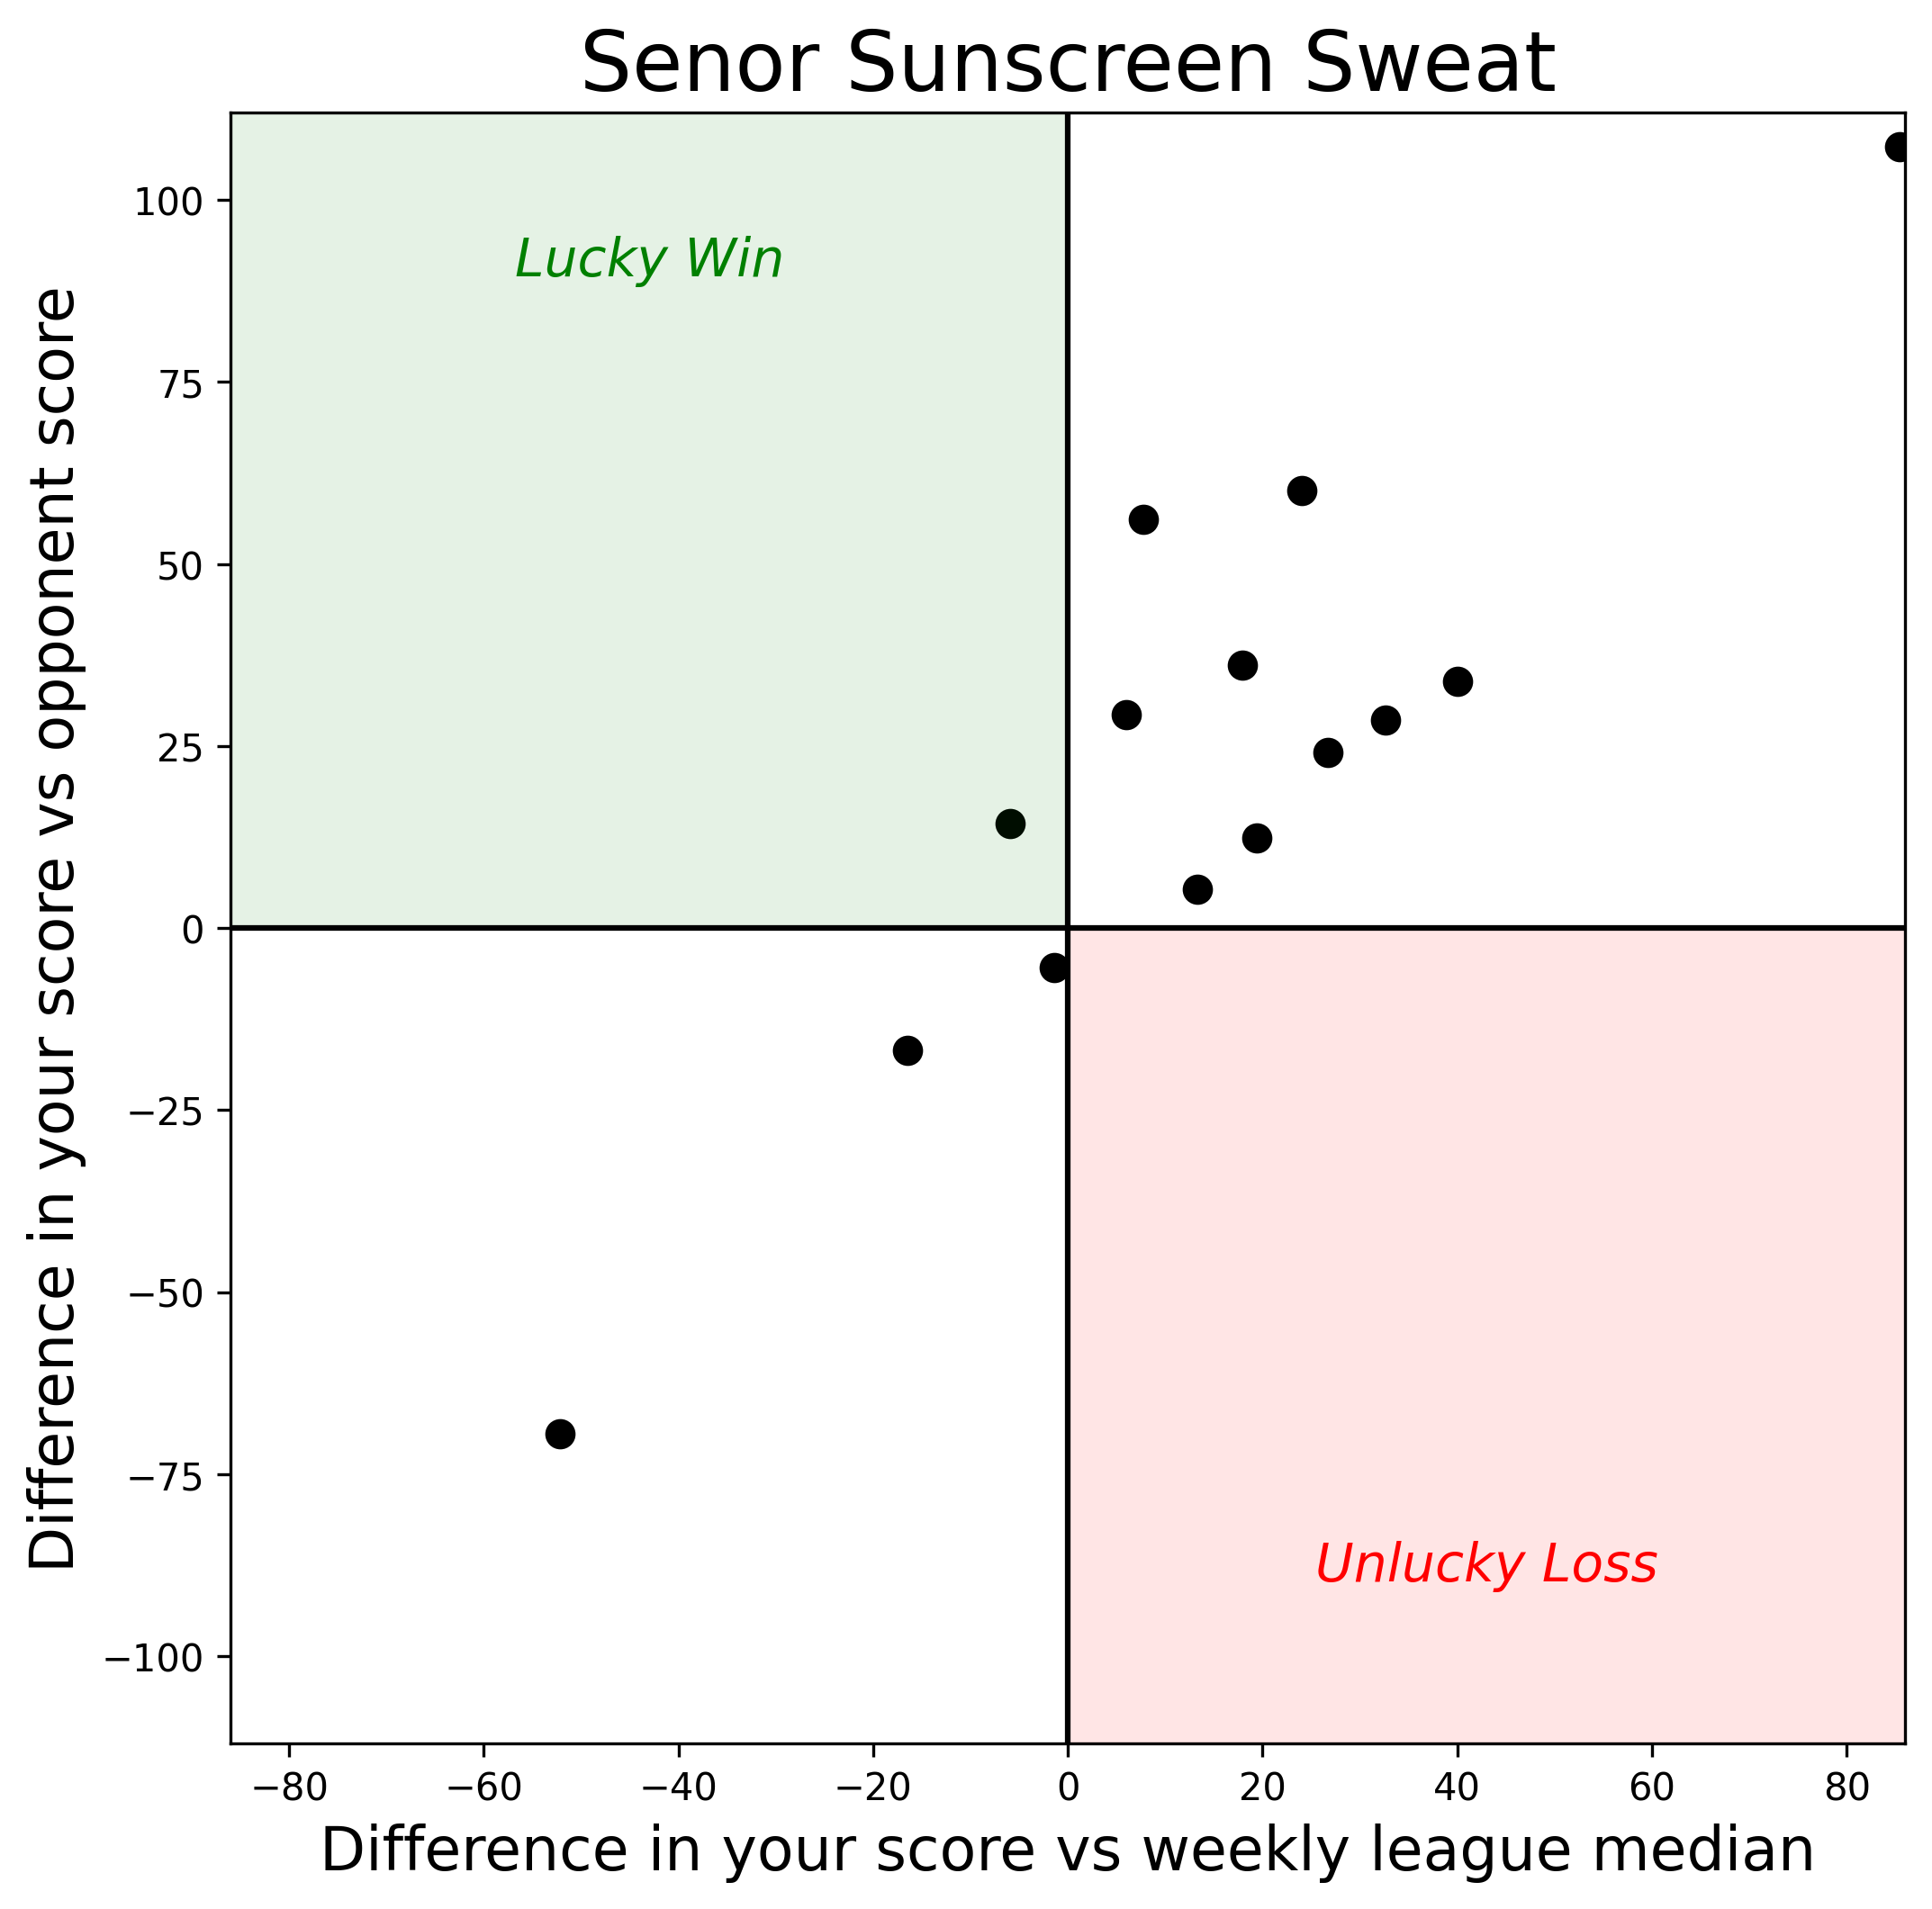

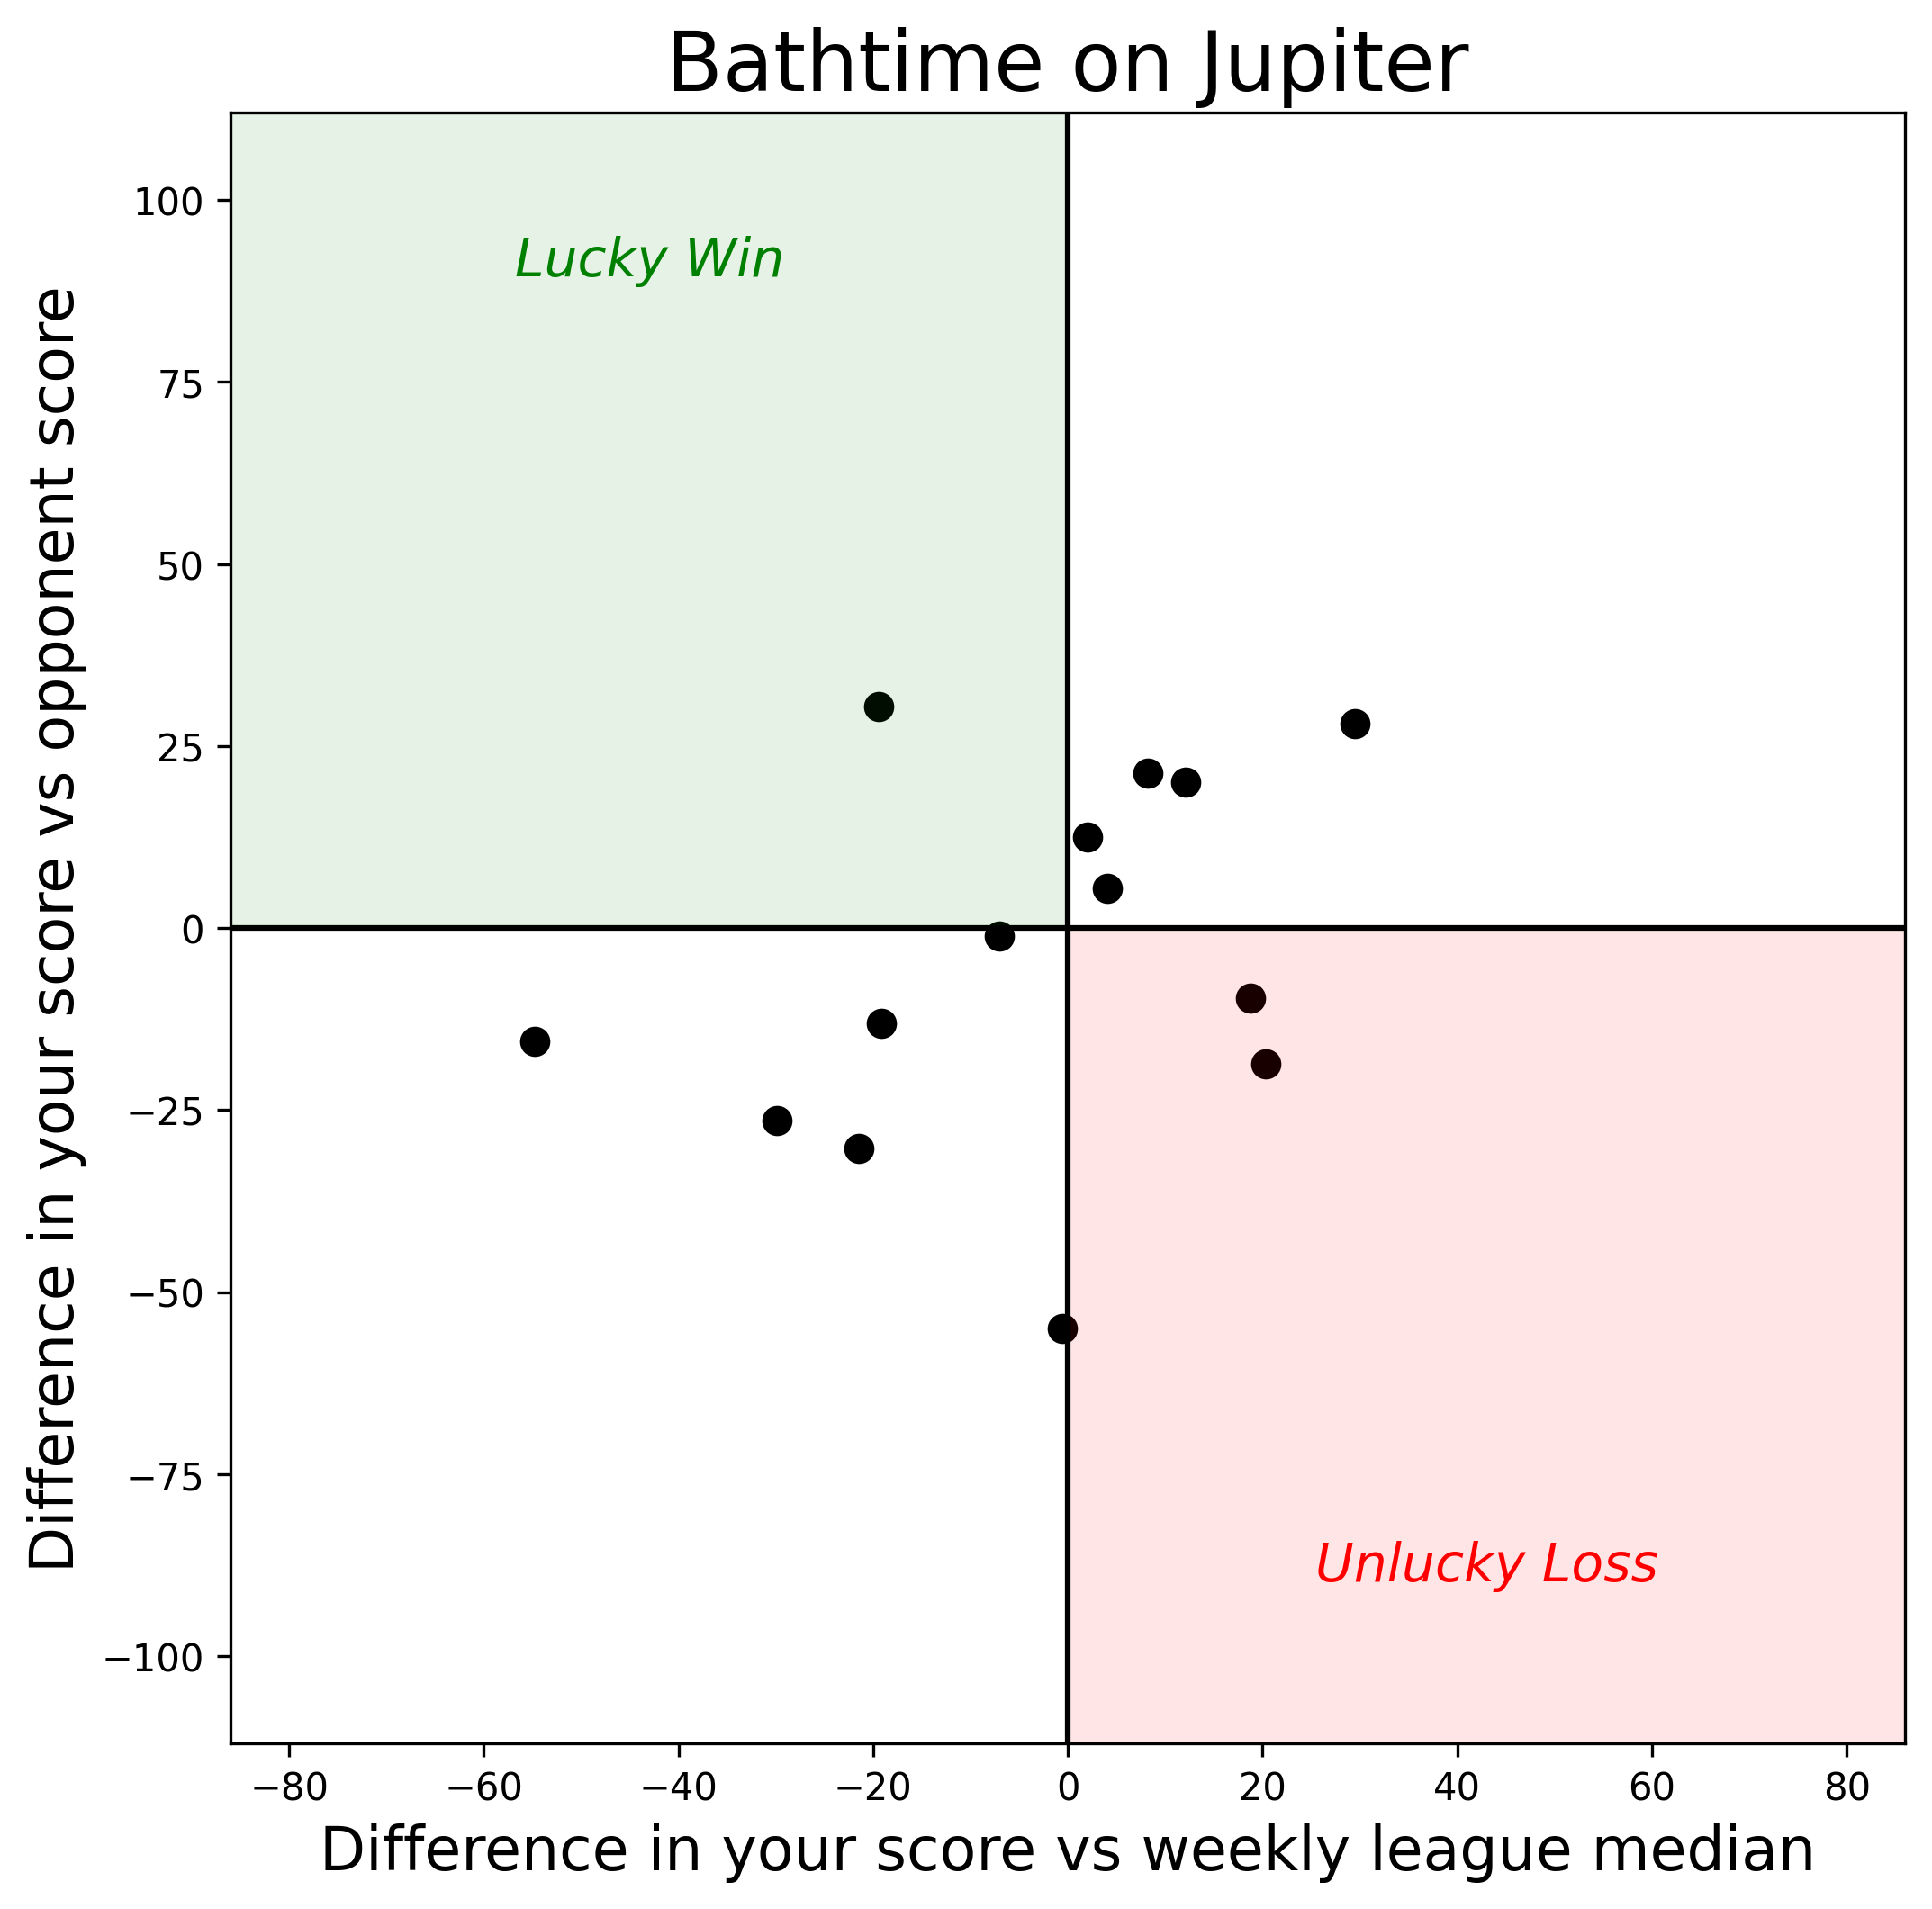

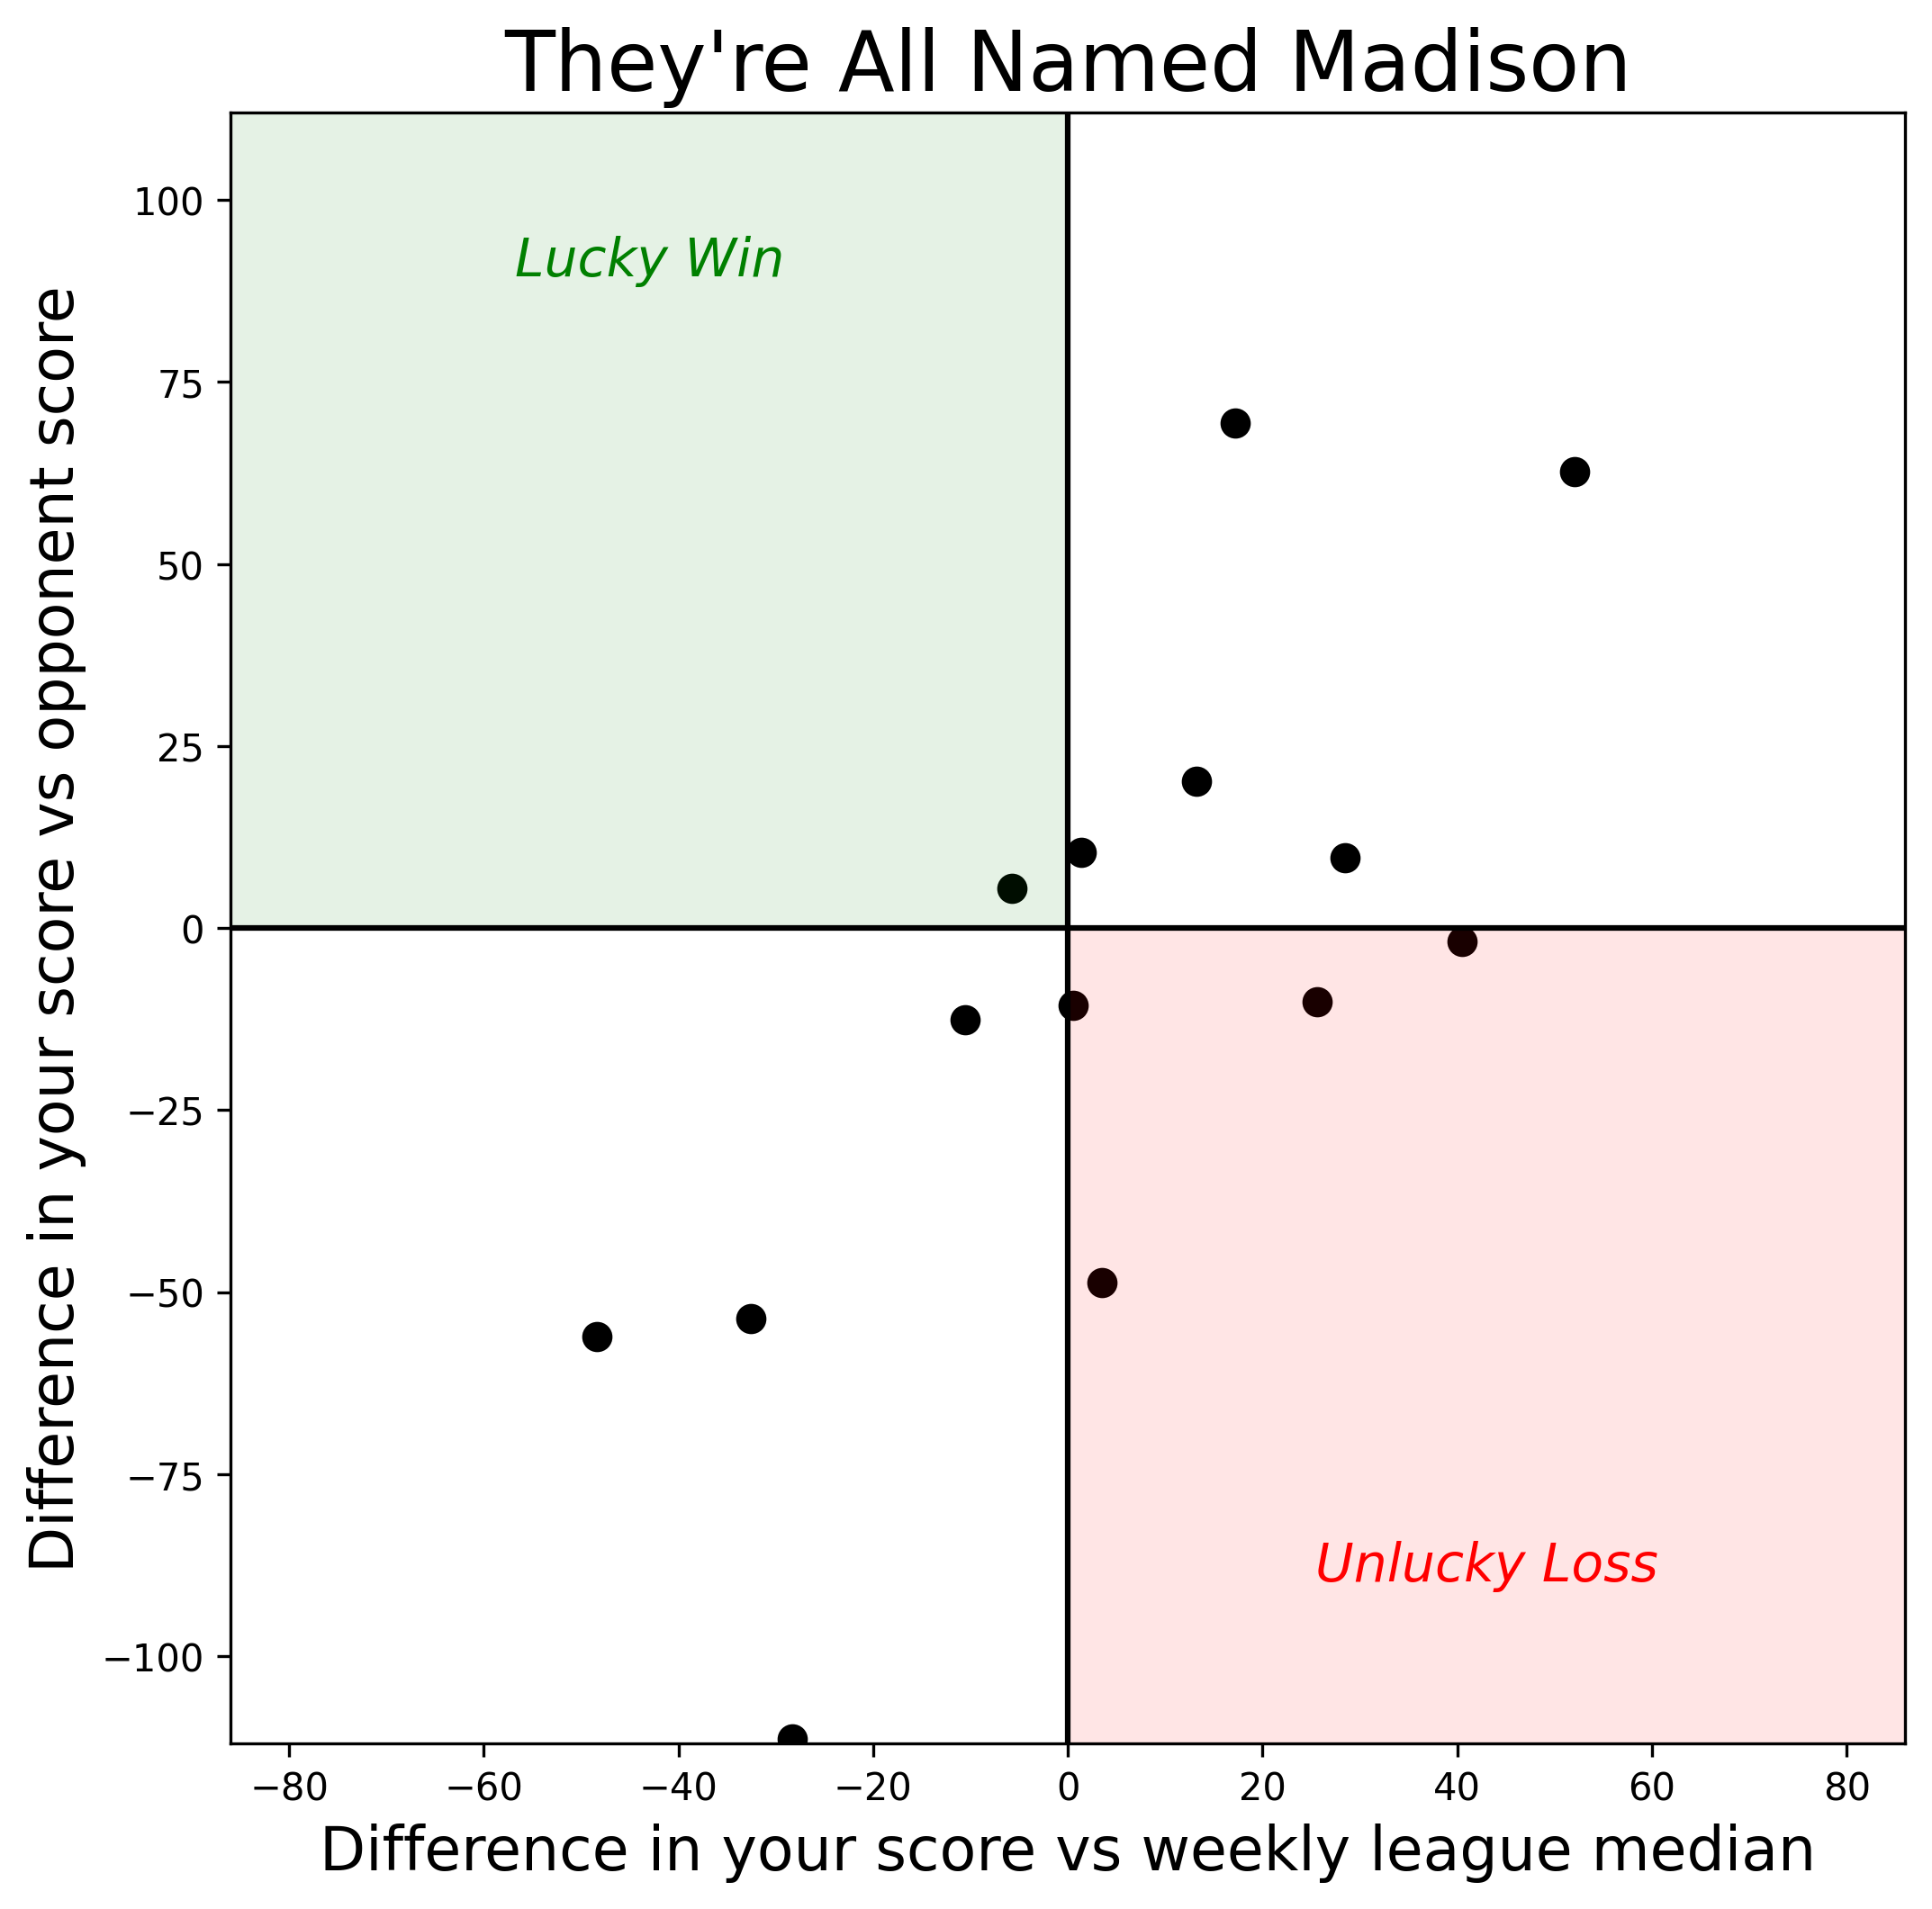

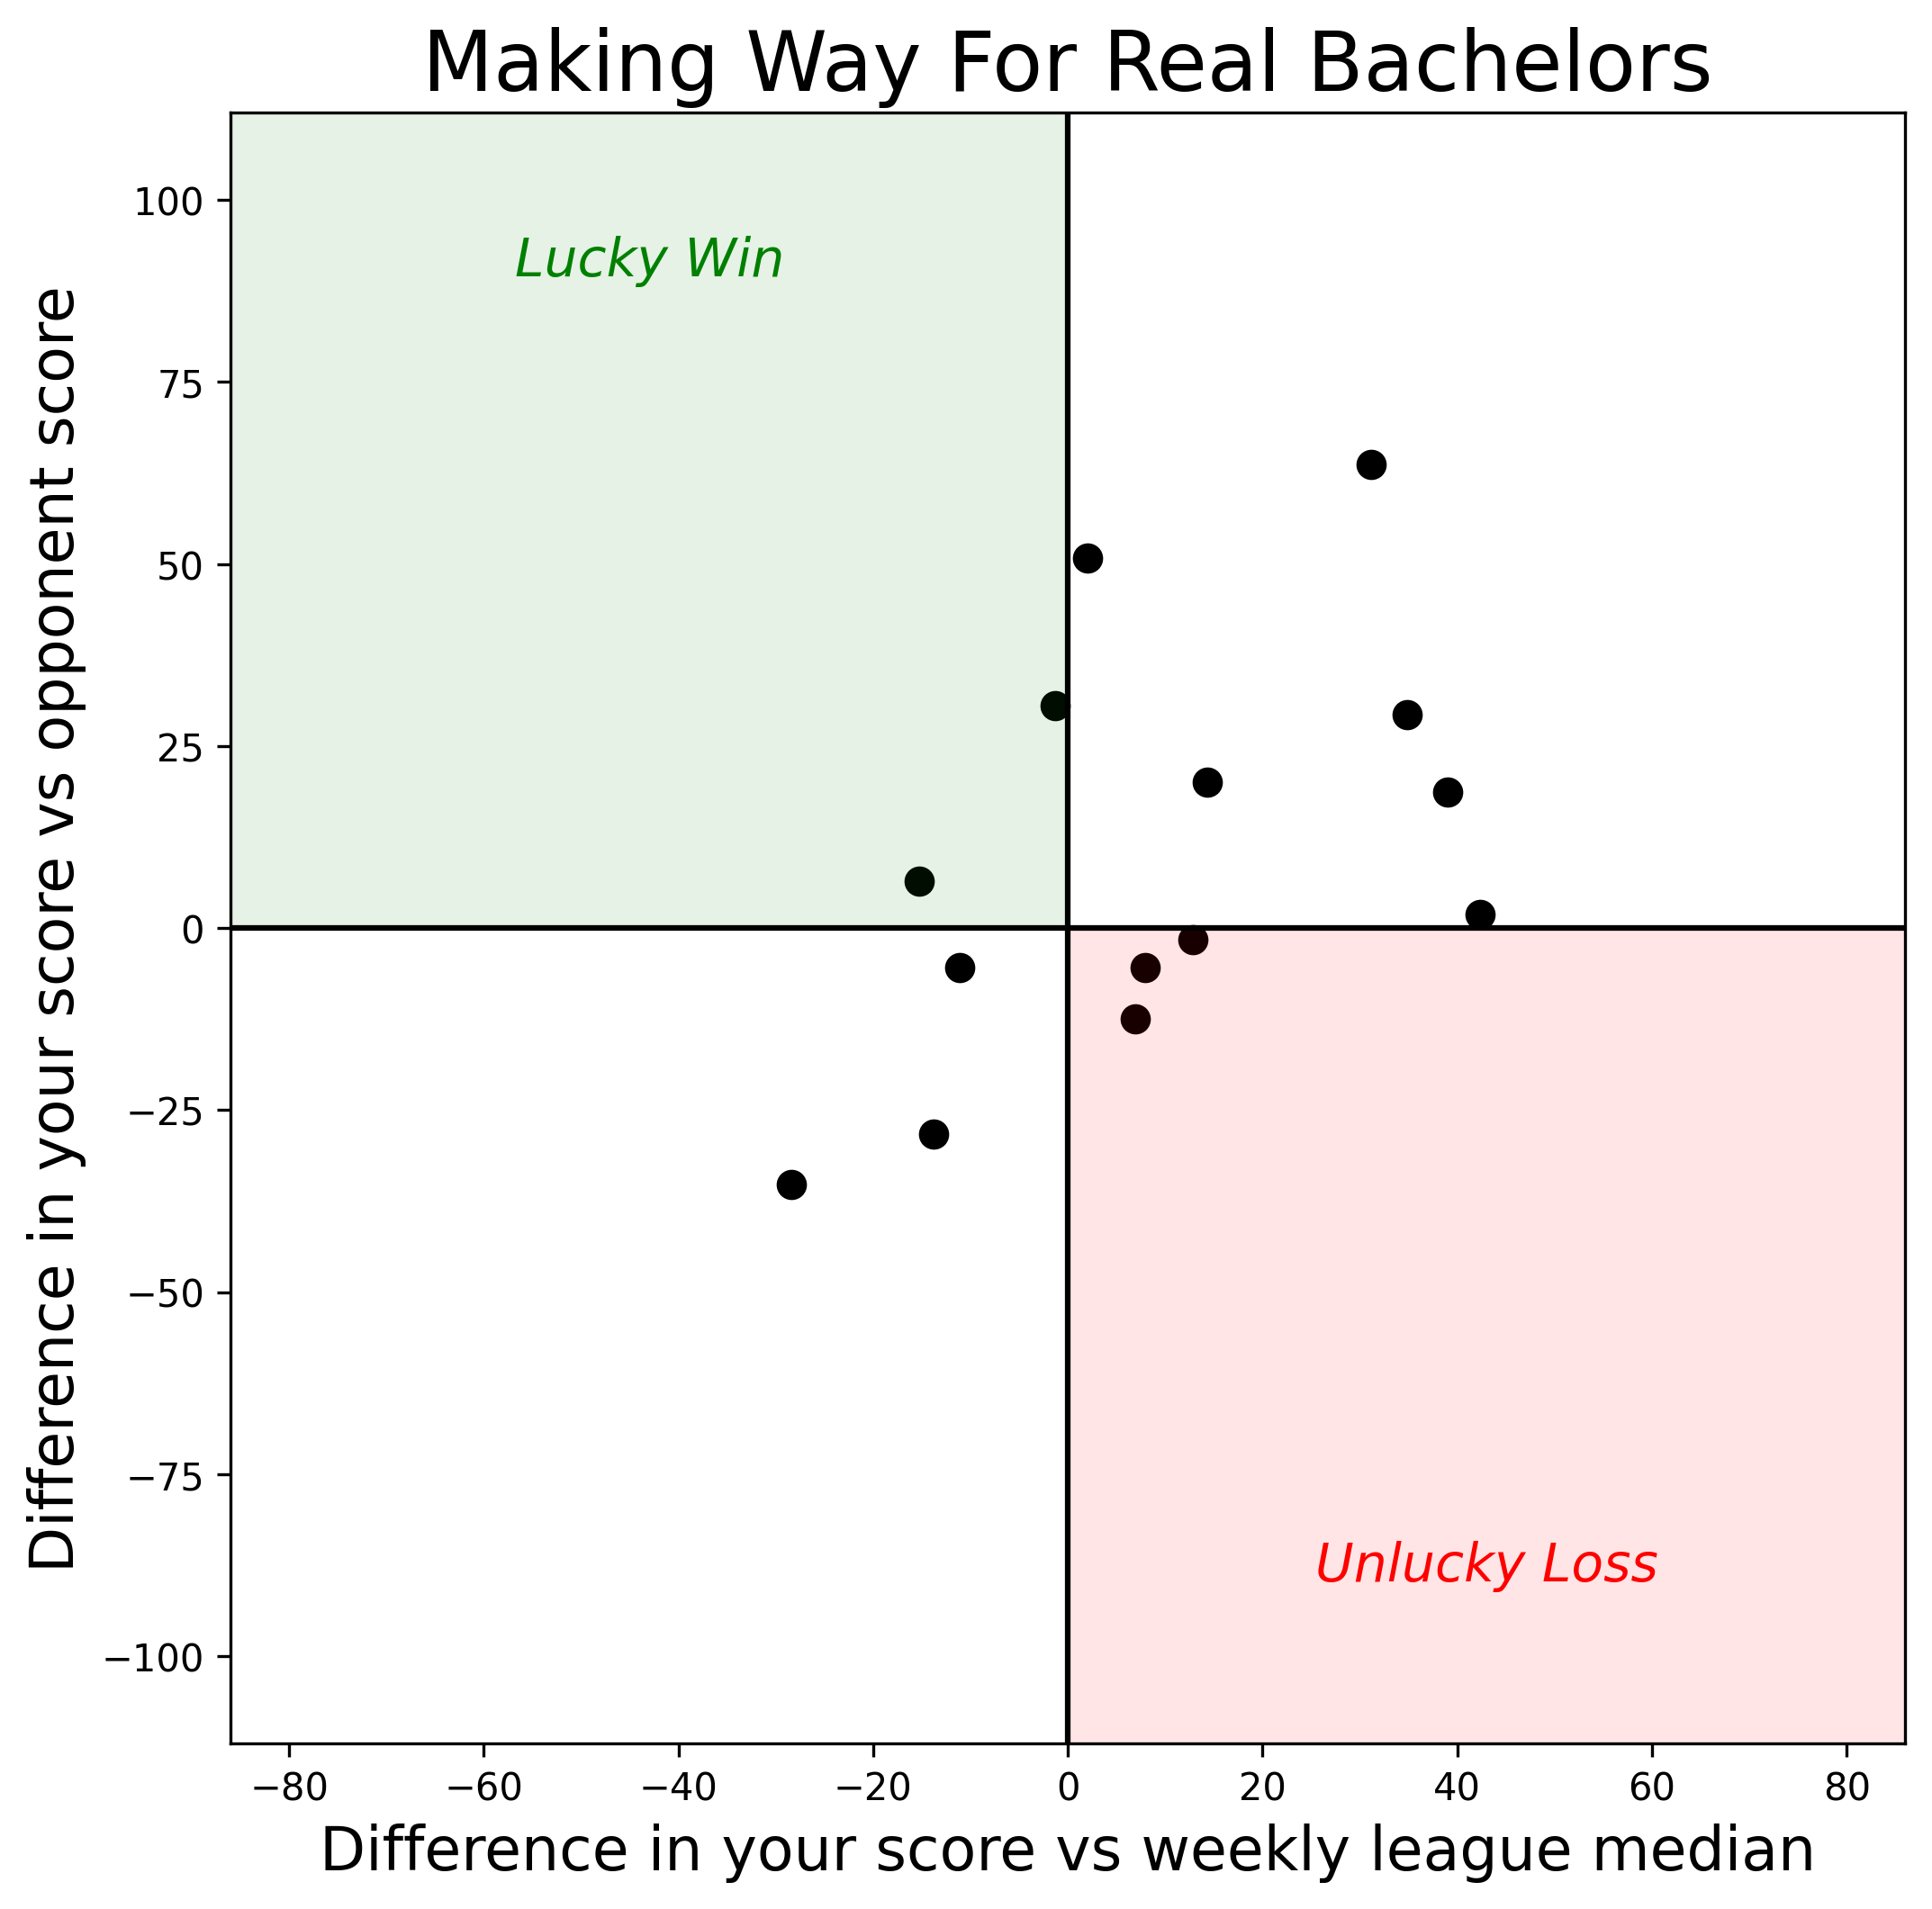

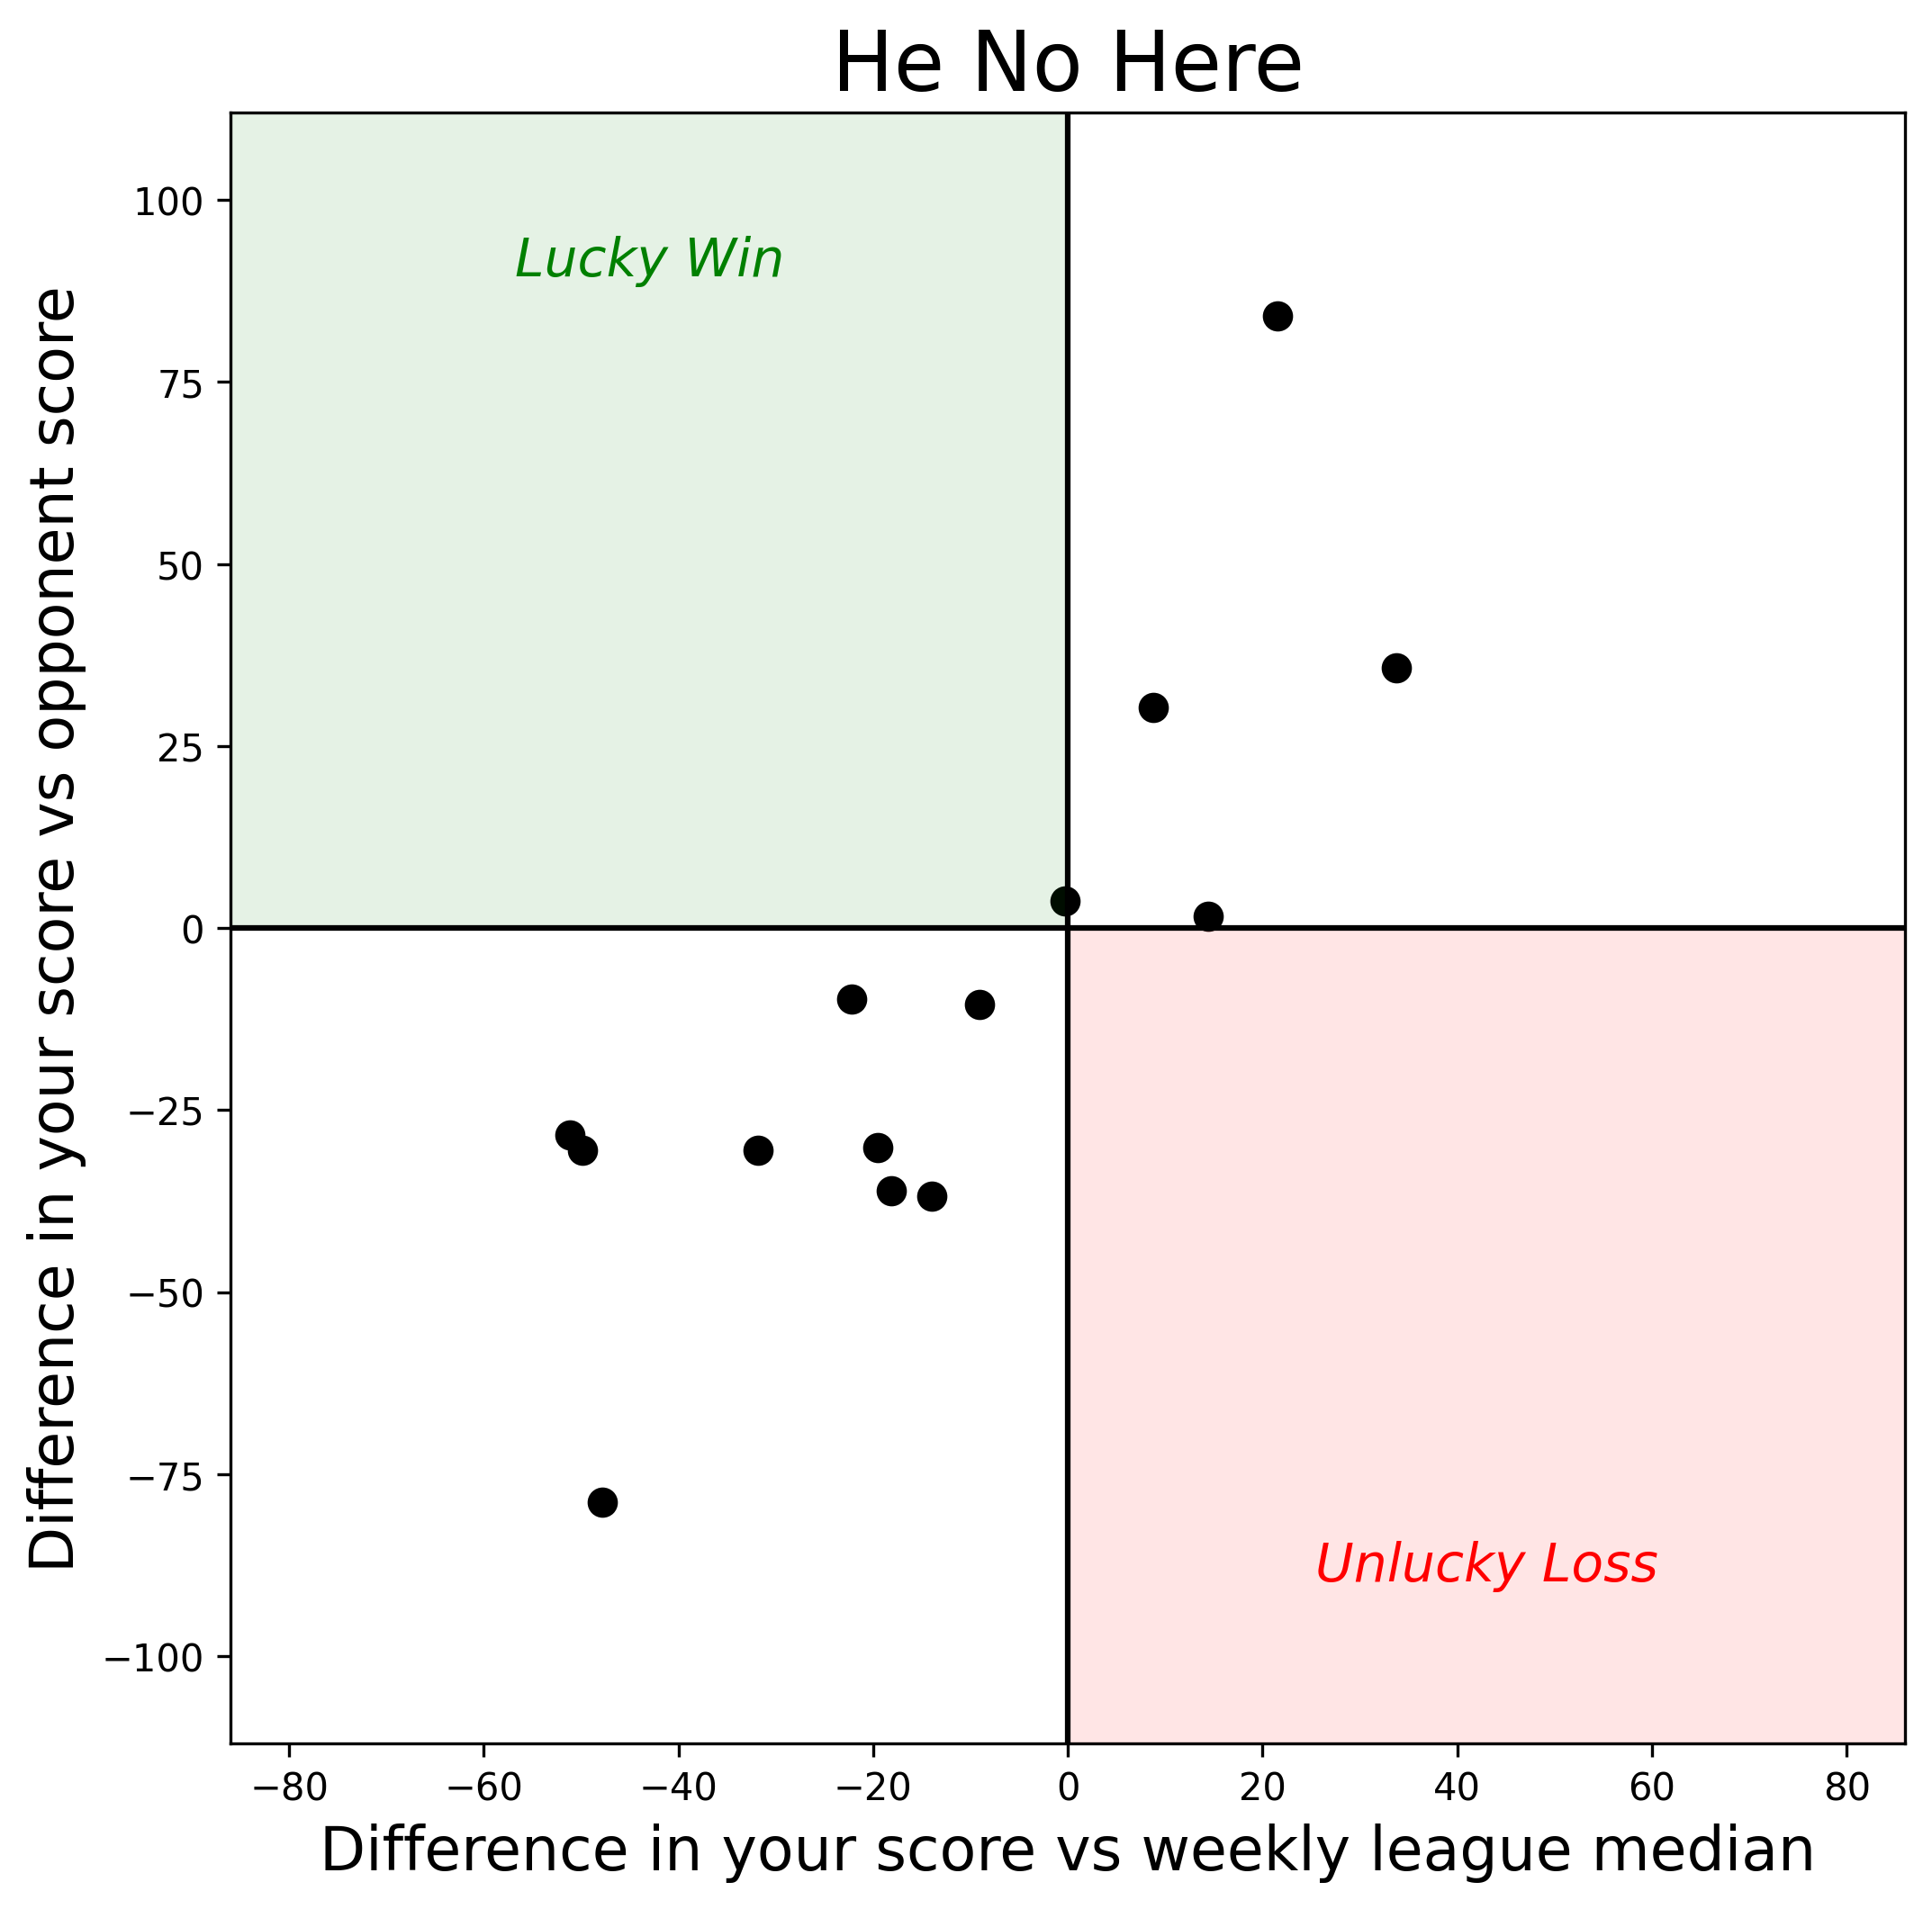

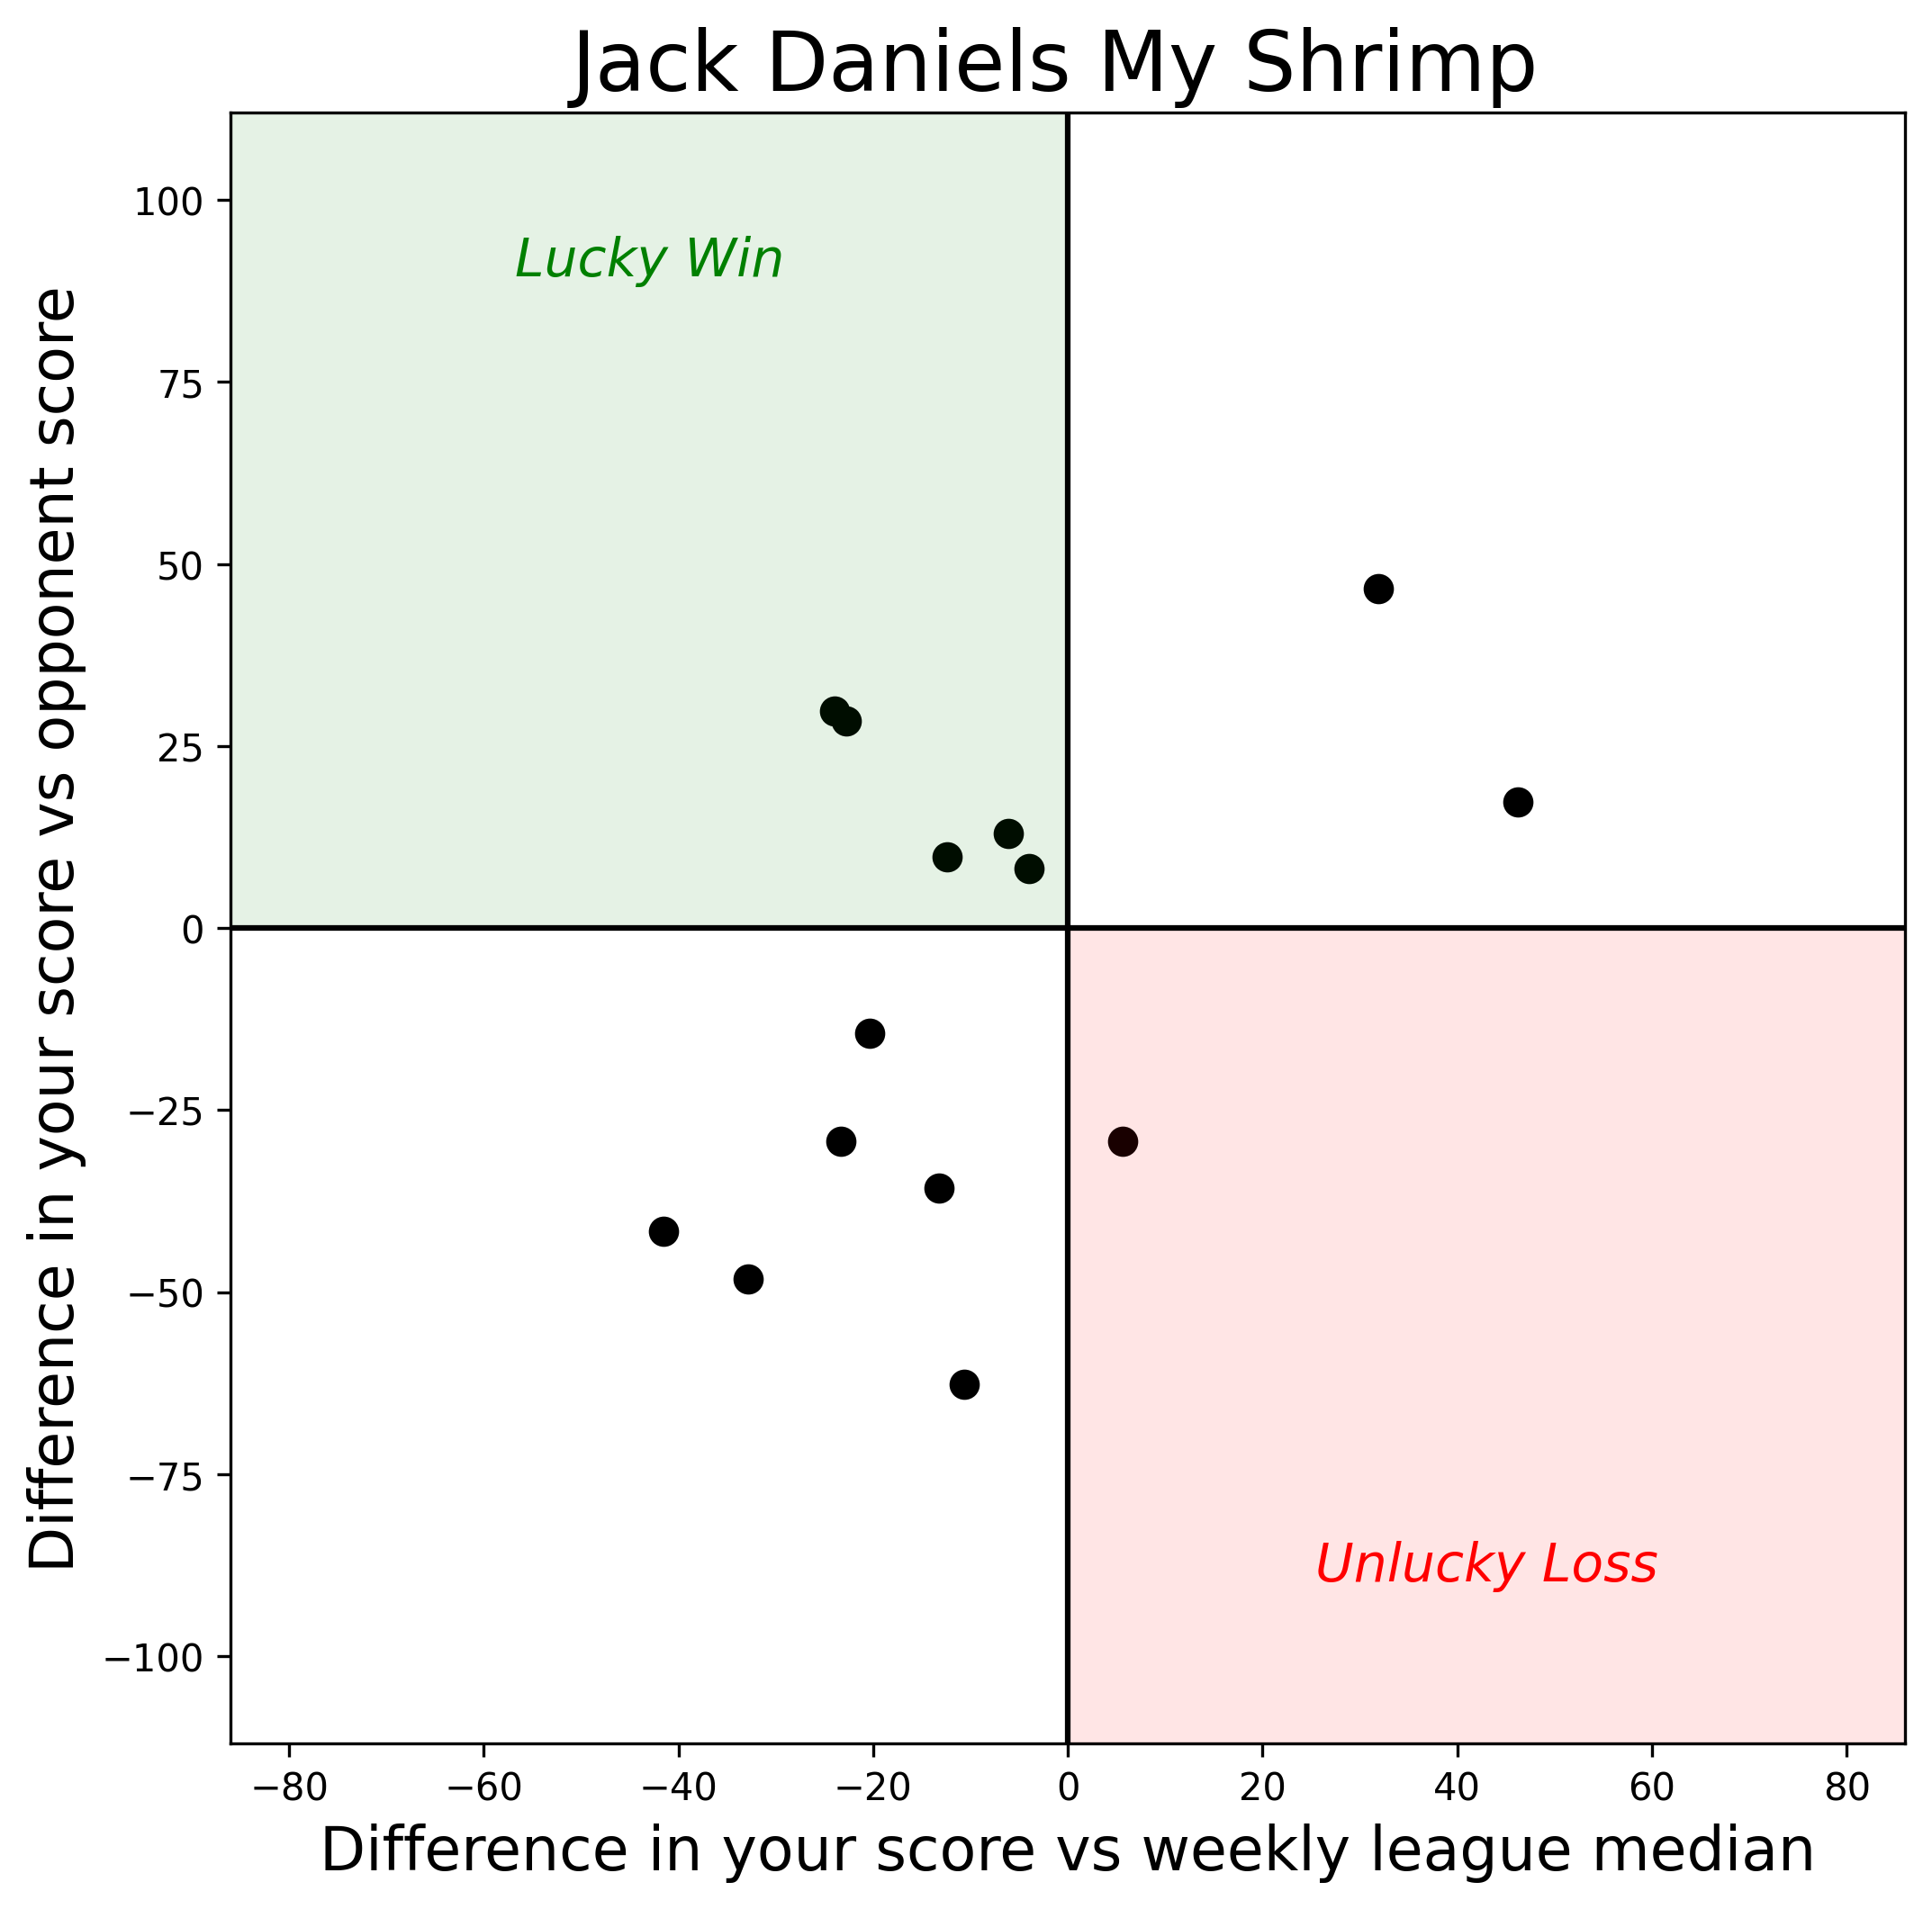

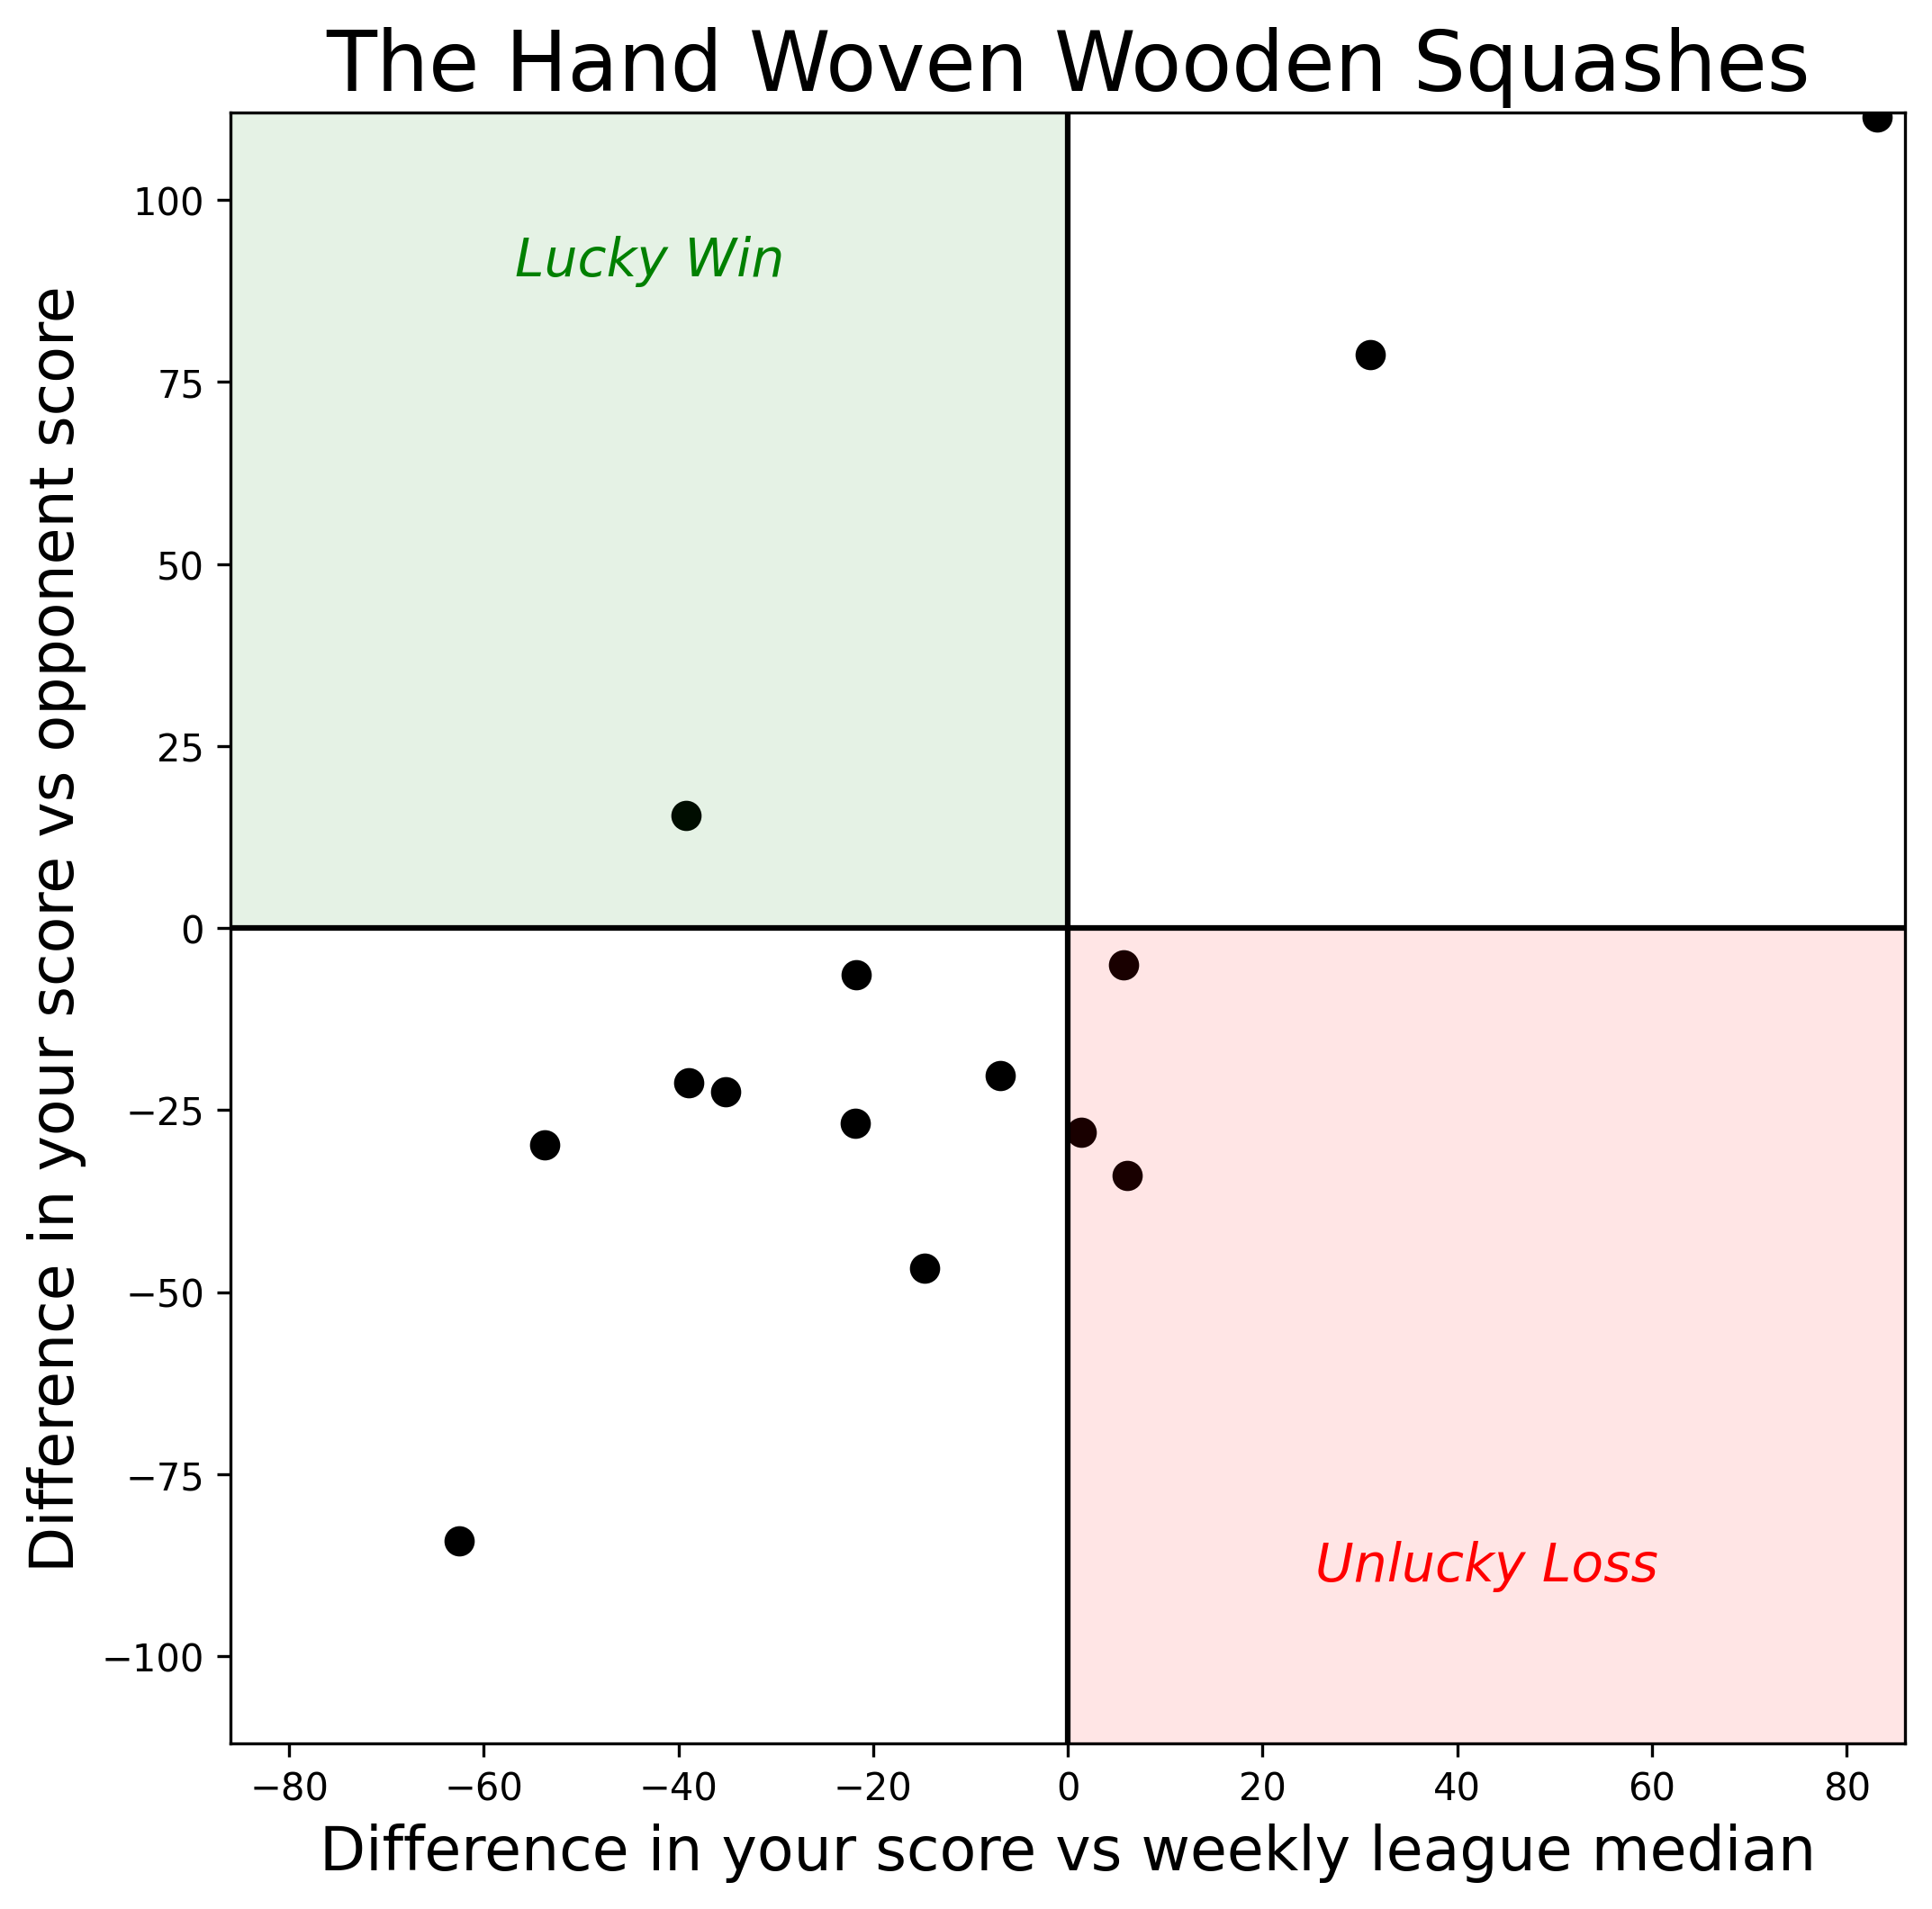

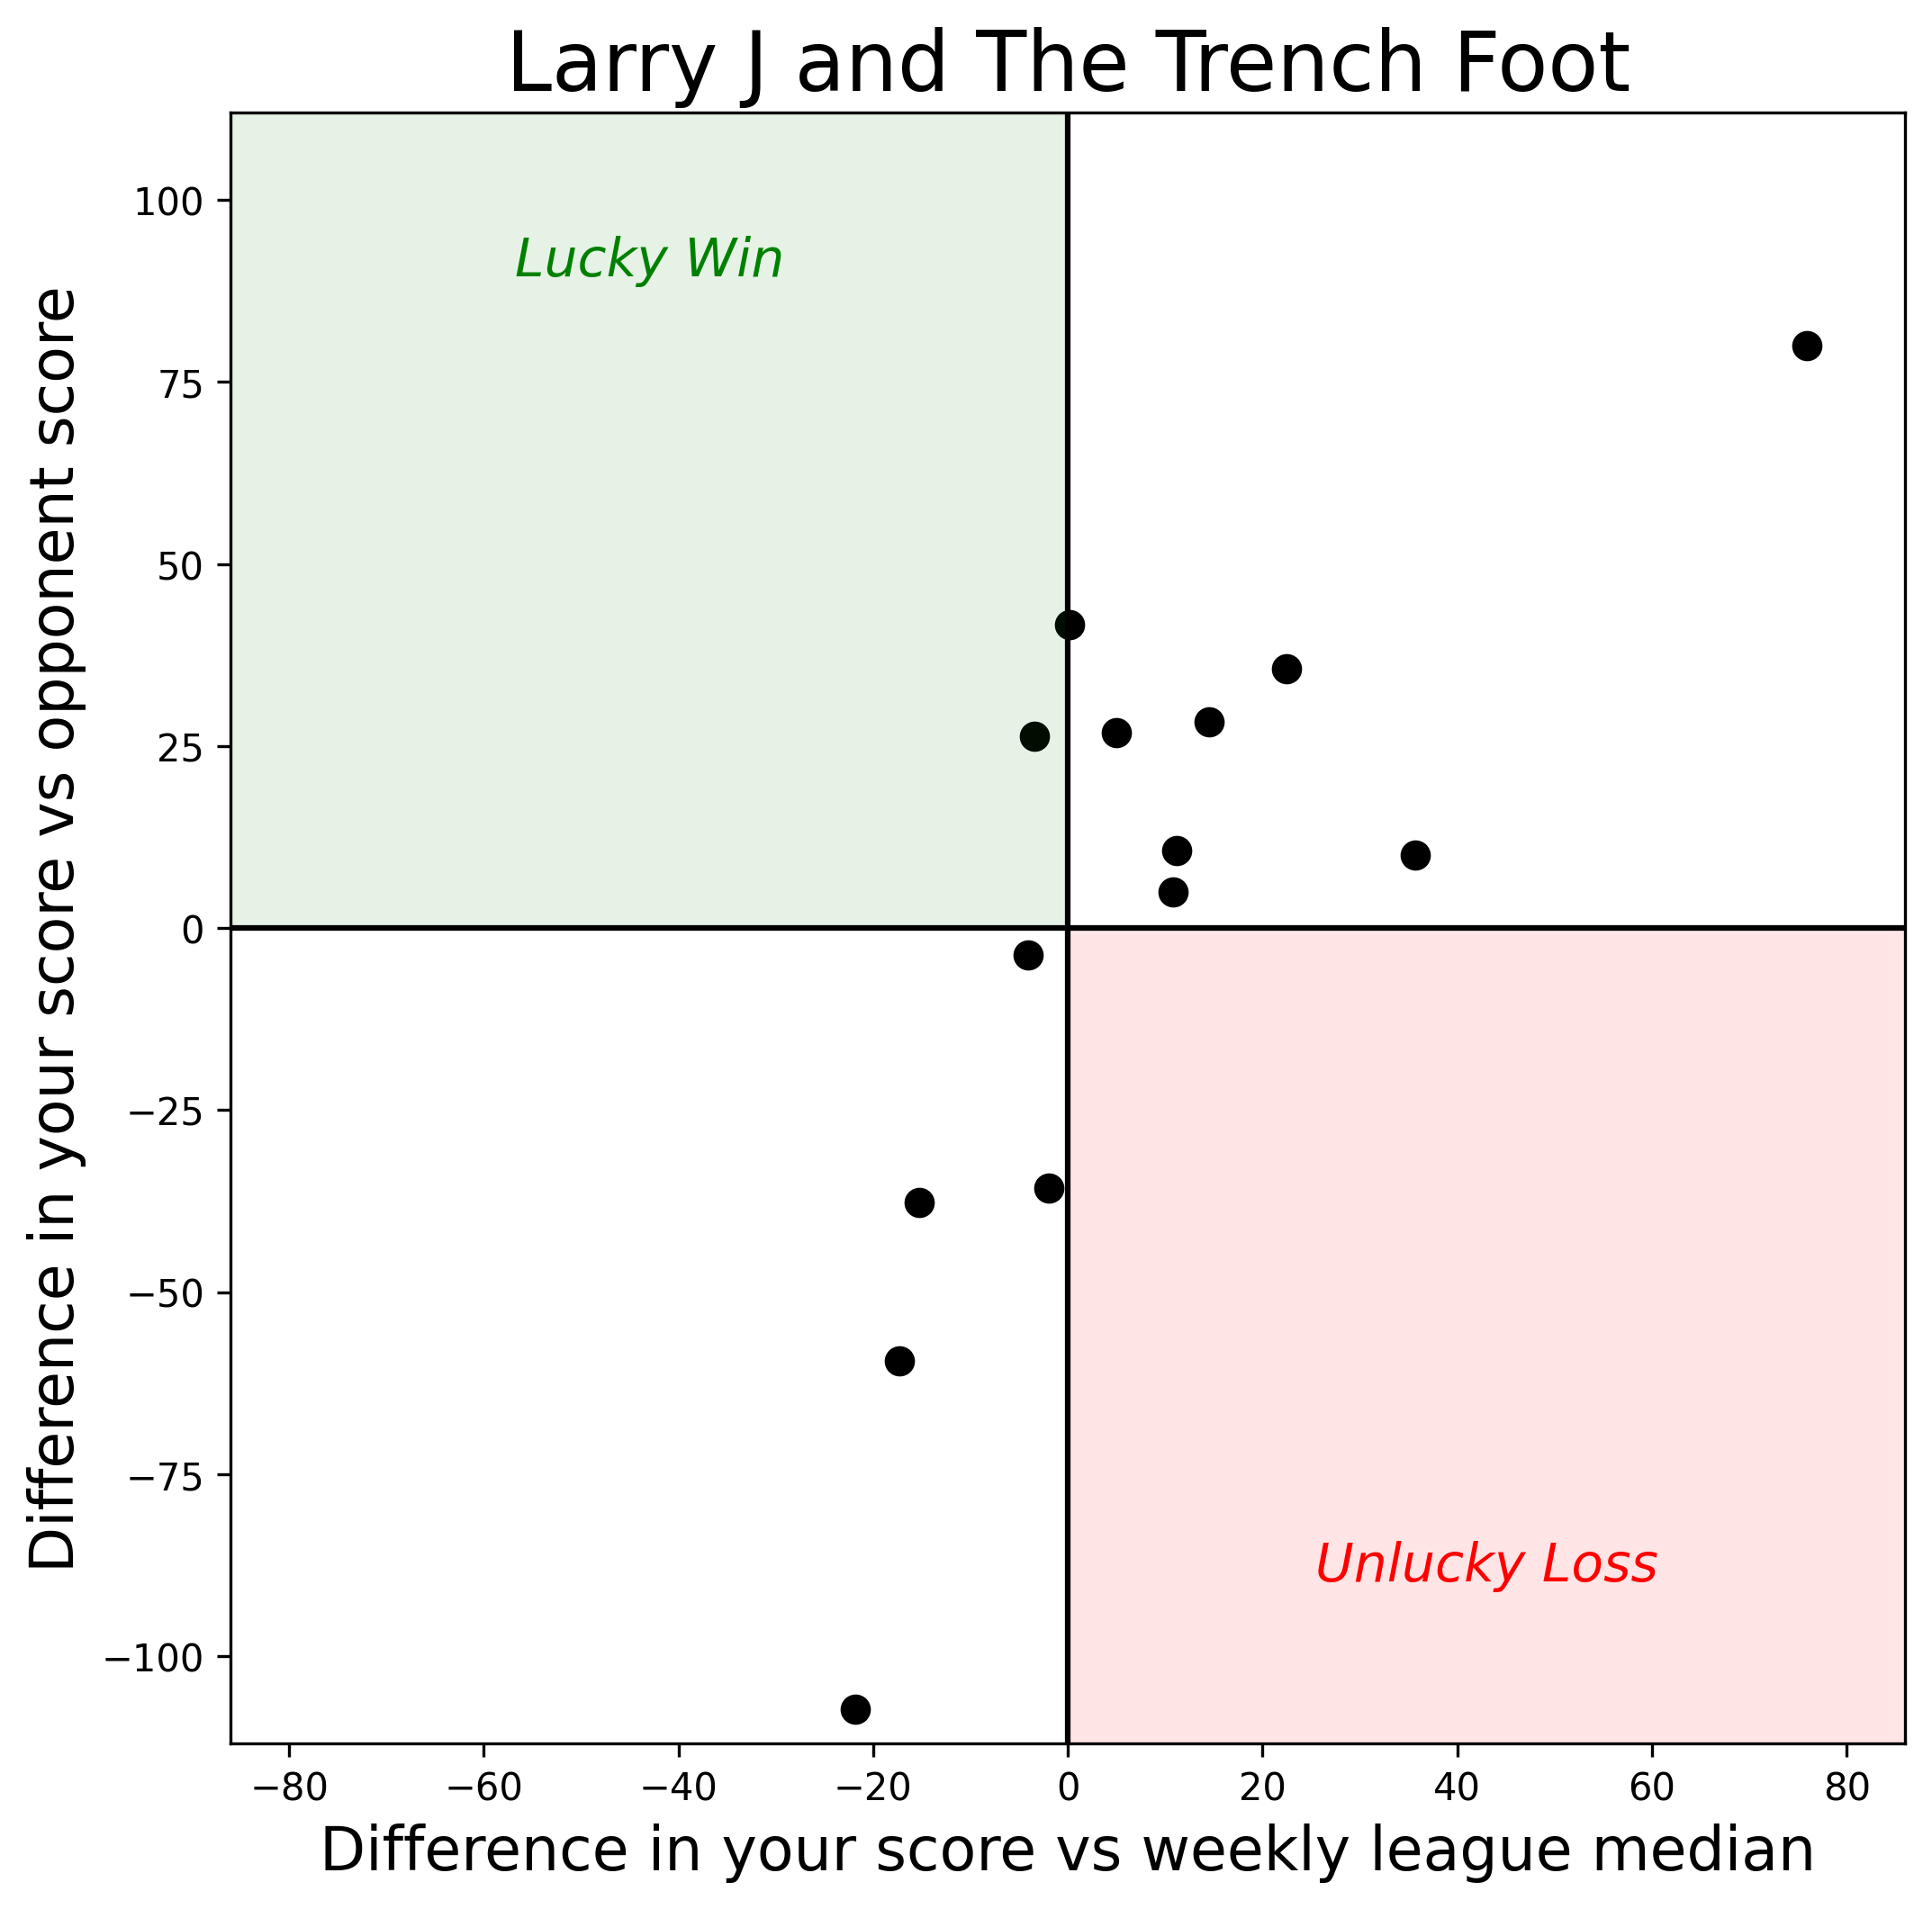

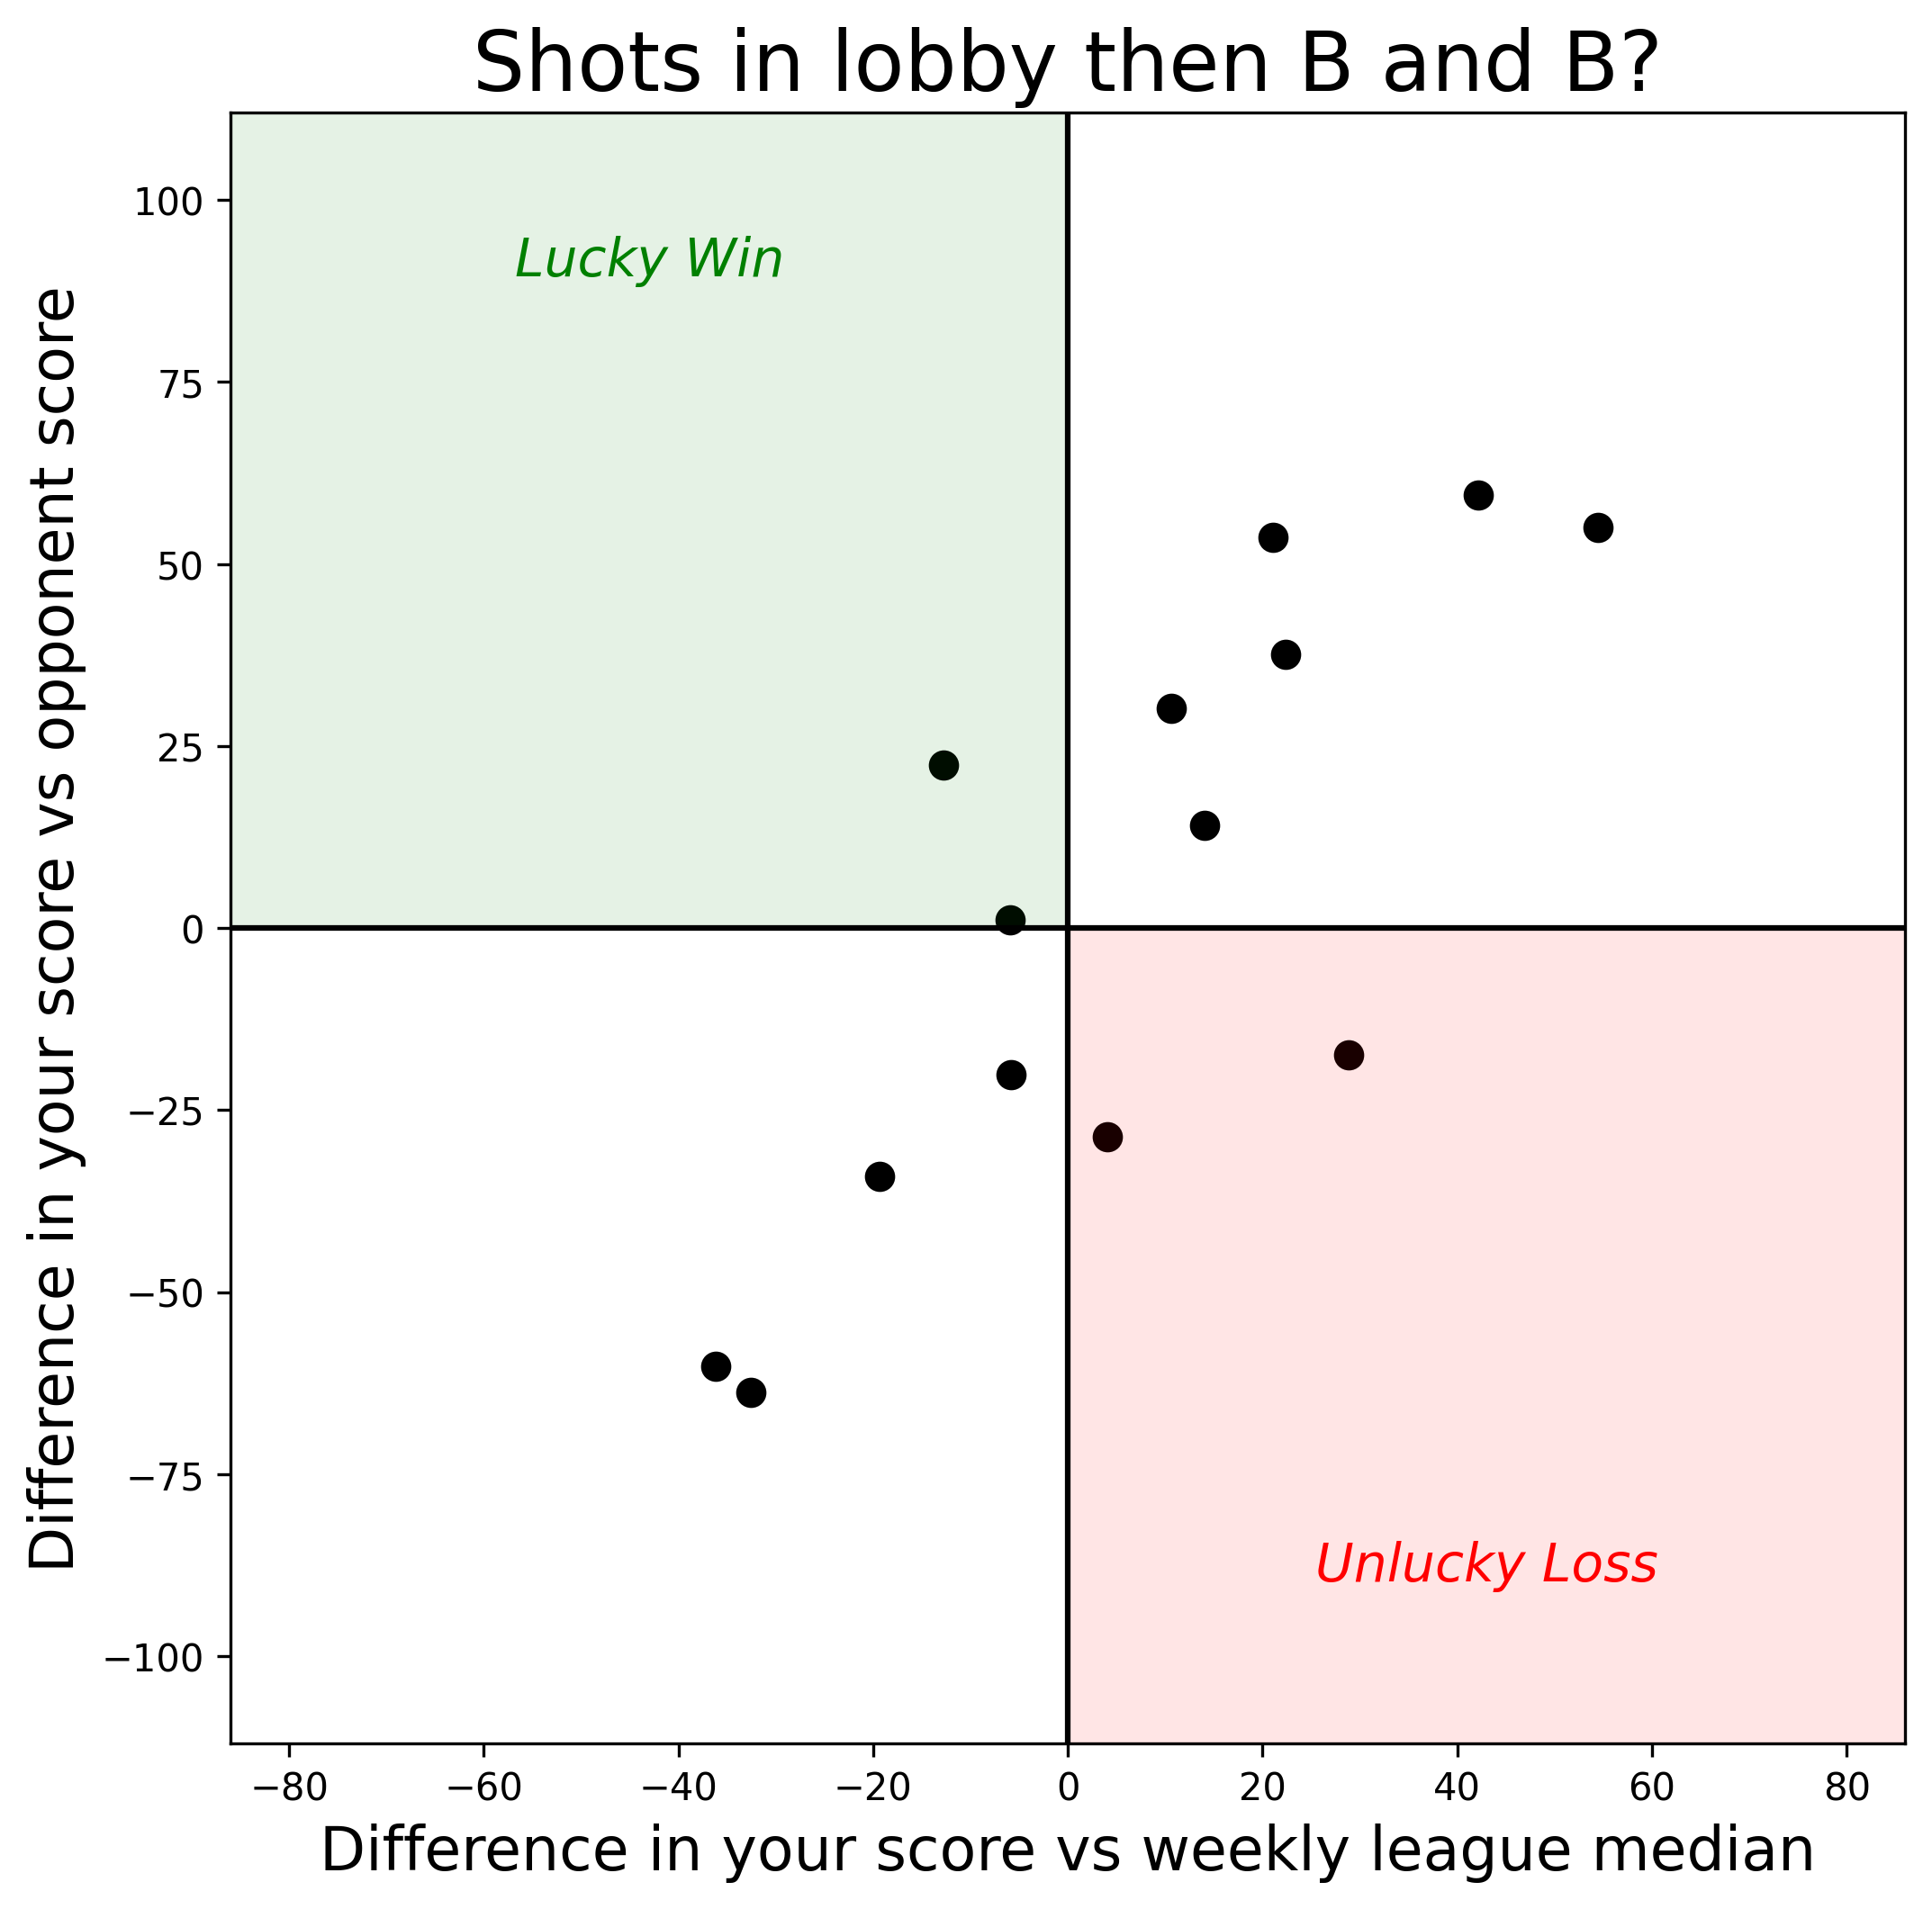

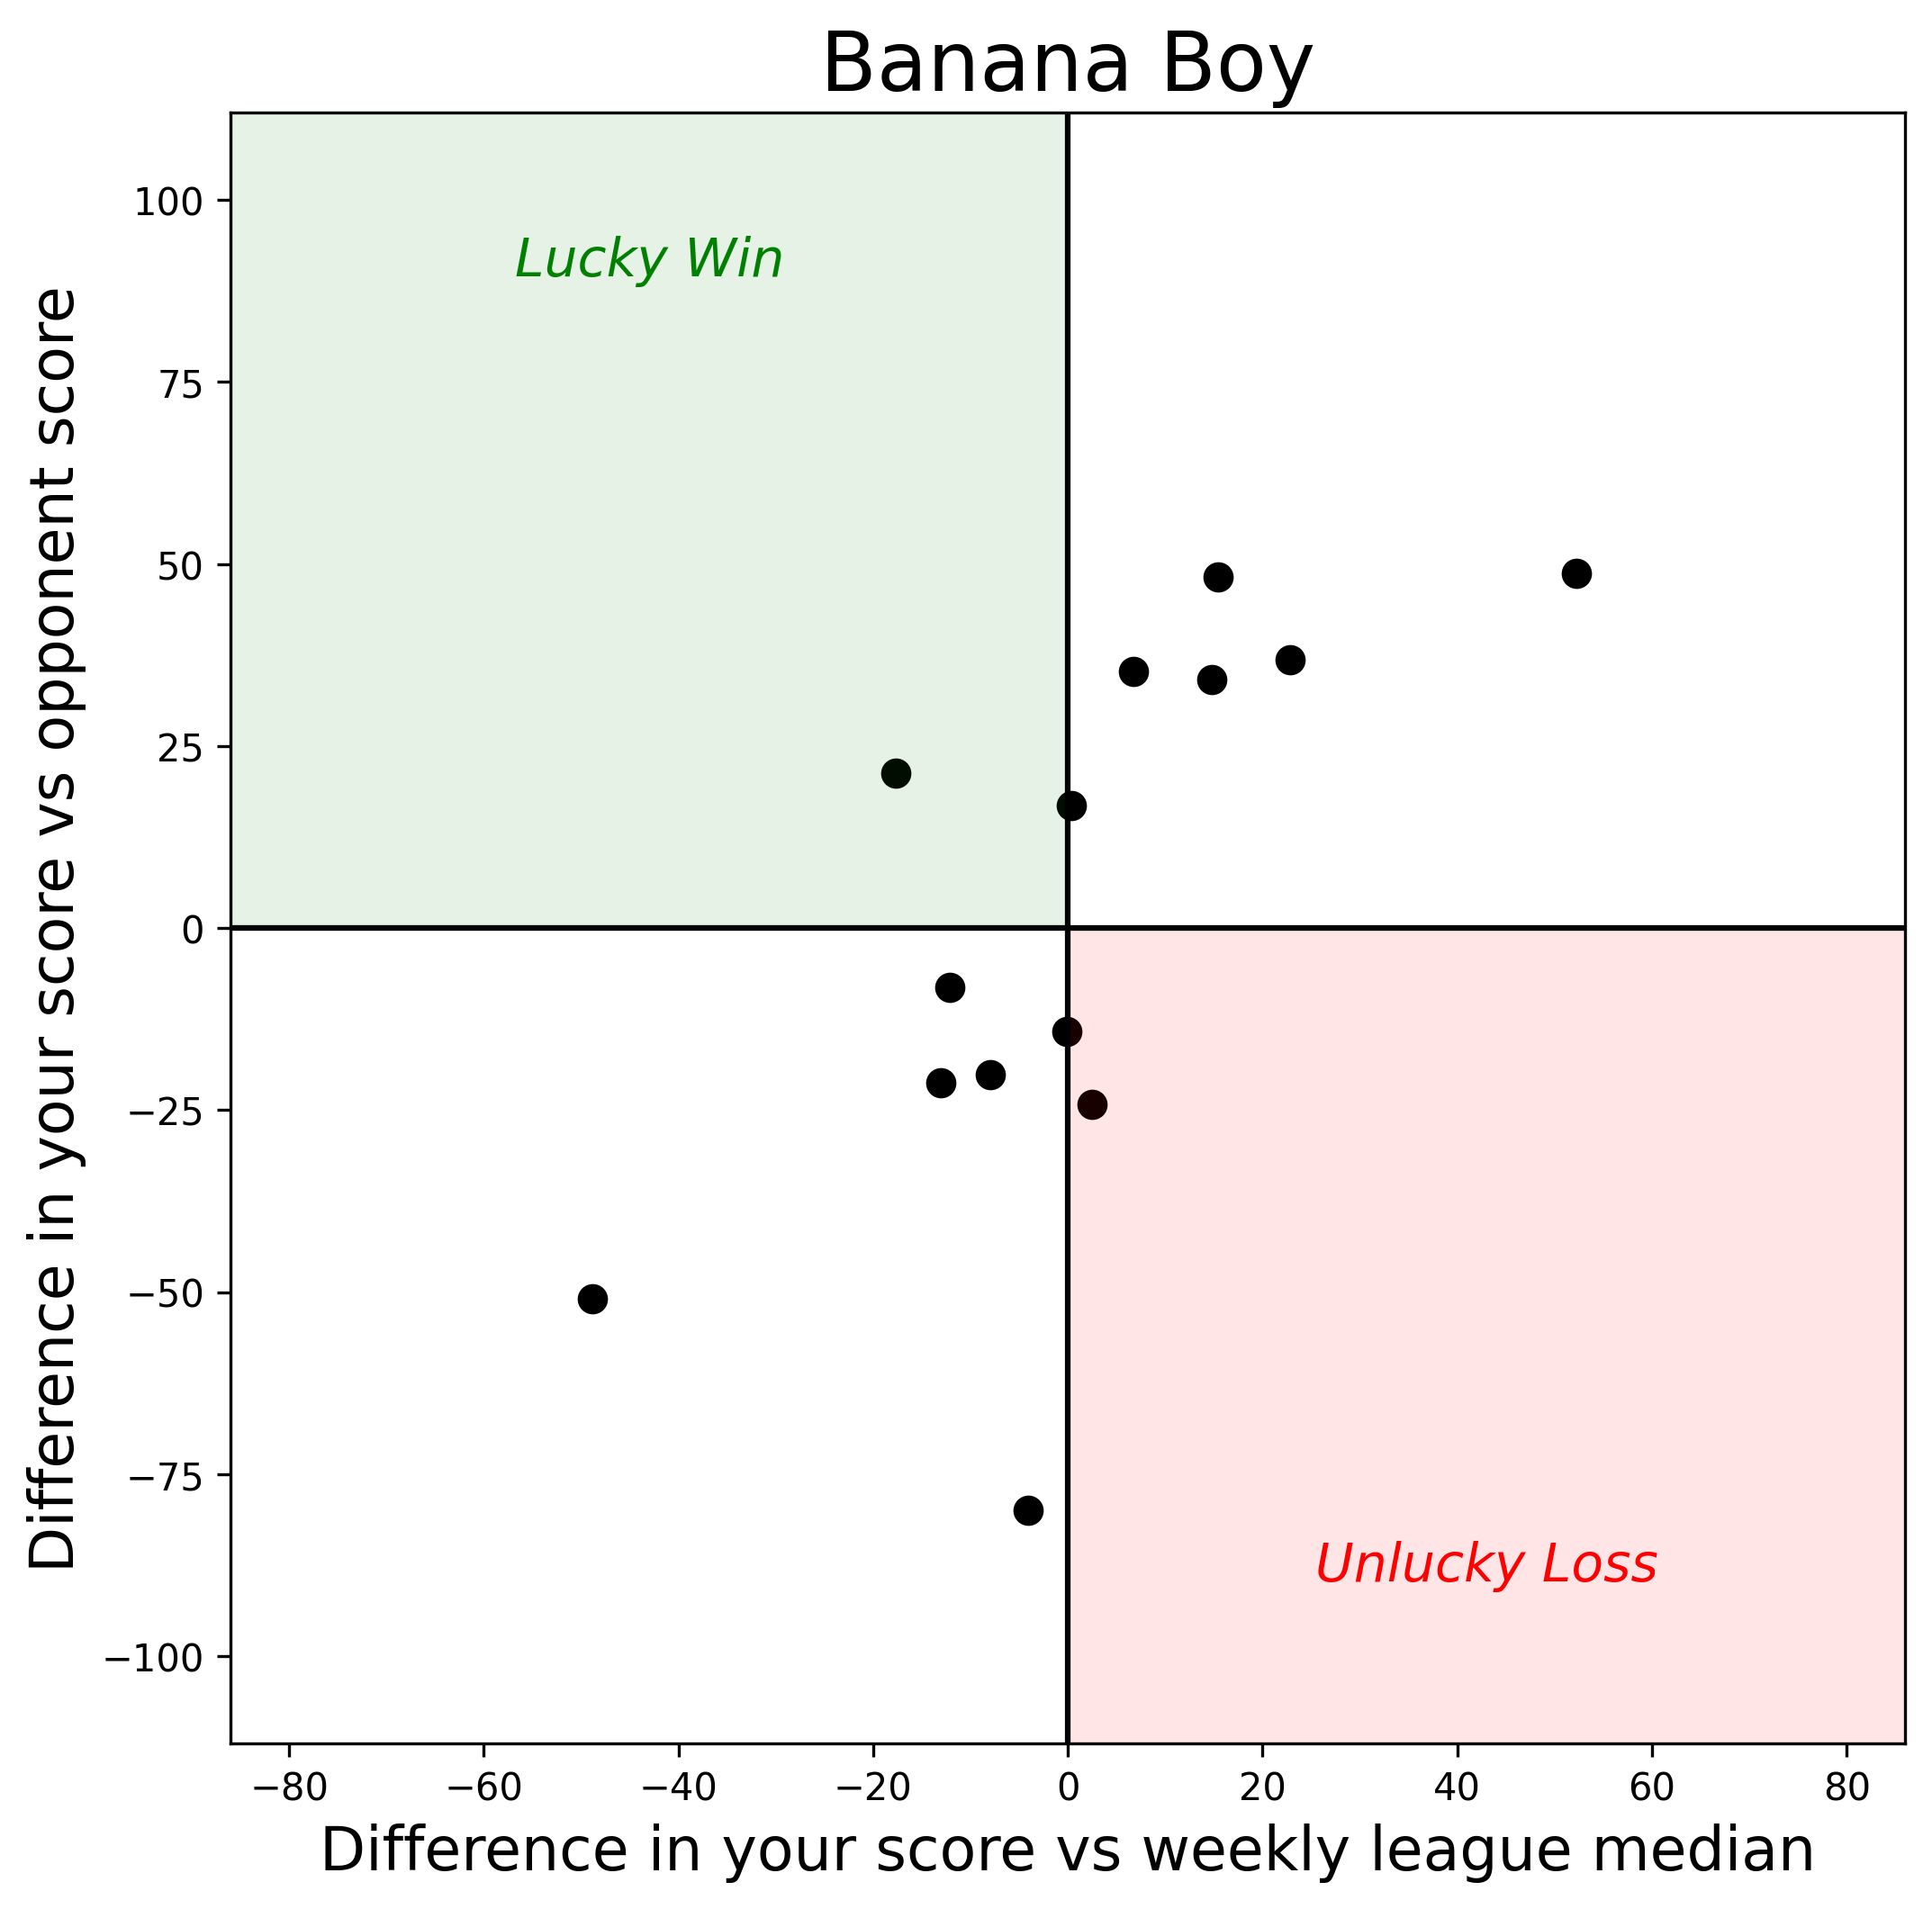

In [9]:
# Plot results

# Unluckly Loss = H2H loss when you were in top half of weekly scorers
# Lucky Win = H2H win when you were in bottom half of weekly scorers

# y axis: difference in your score vs opponent score
# x axis: difference in your score vs league median


x_bound = np.ceil(scores_df.abs().max().max())
y_bound = np.ceil(margins_df.abs().max().max())

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    
    plt.figure(figsize=[8,8])
    plt.scatter(x, y, color="black", s=50)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim(-x_bound, x_bound)
    plt.ylim(-y_bound, y_bound)
    plt.fill_between([0, -x_bound], 0, y_bound, facecolor='g', alpha=0.1)
    plt.fill_between([0, x_bound], 0, -y_bound, facecolor='r', alpha=0.1)
    plt.annotate("Lucky Win", xy=(-x_bound/2, y_bound*4/5), fontsize=14, ha="center", style="italic", color="g")
    plt.annotate("Unlucky Loss", xy=(x_bound/2, -y_bound*4/5), fontsize=14, ha="center", style="italic", color="r")
    plt.ylabel("Difference in your score vs opponent score", fontsize=16)
    plt.xlabel("Difference in your score vs weekly league median", fontsize=16)
    plt.title(team_map[scores_df.index.values[i]]["name"], fontsize=22)
    

In [10]:
# Summary table

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    team = team_map[scores_df.index.values[i]]["name"]

    lw, ul = 0, 0
    for j in range(len(x)):
        if x[j] < 0 and y[j] > 0:
            lw += 1
        elif x[j] >0 and y[j] < 0:
            ul += 1
            
    print(team)
    print("Lucky Wins: {}".format(lw))
    print("Unlucky Losses: {}".format(ul))
    


Senor Sunscreen Sweat
Lucky Wins: 1
Unlucky Losses: 0
Bathtime on Jupiter
Lucky Wins: 1
Unlucky Losses: 2
They're All Named Madison
Lucky Wins: 1
Unlucky Losses: 4
Making Way For Real Bachelors
Lucky Wins: 2
Unlucky Losses: 3
He No Here
Lucky Wins: 1
Unlucky Losses: 0
Jack Daniels My Shrimp 
Lucky Wins: 5
Unlucky Losses: 1
The Hand Woven Wooden Squashes
Lucky Wins: 1
Unlucky Losses: 3
Larry J and The Trench Foot
Lucky Wins: 1
Unlucky Losses: 0
Shots in lobby then B and B?
Lucky Wins: 2
Unlucky Losses: 2
Banana Boy
Lucky Wins: 1
Unlucky Losses: 1
